# Projet : Analyse de l'impact de la pollution atmosph√©rique sur la sant√© en France M√©tropolitaine

## I. Objectif  

D√©velopper un pipeline automatis√© pour collecter, nettoyer, explorer et analyser les donn√©es sur la pollution de l'air et ses effets sur la sant√©. 
Il s‚Äôagit de quantifier le nombre de d√©c√®s attribuables √† l'exposition √† la pollution de l'air, en particulier aux particules fines (PM2.5)  et au dioxyde d'azote (NO2) en tenant compte des facteurs d√©mographiques et g√©ographiques.

Selon les estimations, environ 40 000 d√©c√®s par an en France sont li√©s √† la pollution de l'air ambiant, ce qui repr√©sente une perte d'esp√©rance de vie significative pour les personnes expos√©es.

Cette analyse permettra de r√©pondre aux questions suivantes : 
    
    - Comment les effets de la pollution varient-ils selon les groupes d√©mographiques ?
    
    - Comment la pollution affecte-t-elle diff√©remment les tranches d'√¢ge et les sexes ?
    
    - Y a-t-il des in√©galit√©s g√©ographiques dans l'exposition √† la pollution et ses effets ?


## II. Description du projet 

Voici les diff√©rentes √©tapes du pipeline : 

### 1.	Collecte des donn√©es

Vous allez extraire les donn√©es de pollution atmosph√©rique et de sant√© (possibilit√© de d√©velopper des scripts Python) pour une ou deux r√©gions sur la p√©riode 2019-2020 en interrogeant diff√©rentes sources.

a)	Pour les donn√©es de pollution : Elles porteront sur les polluants PM2.5 et NO2 avec les caract√©ristiques suivantes : concentrations moyennes (journali√®res et/ou annuelles), les piques de concentration (valeurs maximales pour l‚Äô√©valuation des expositions aig√ºes), les variations saisonni√®res, les donn√©es spatiales (zones g√©ographiques).
Les sources √† interroger sont : 

    - Geodair sur la qualit√© de l‚Äôair au quotidien : https://www.geodair.fr

    - Mesures des concentrations des polluants √† partir des donn√©es ouvertes de data.gouv.fr (en utilisant l‚ÄôAPI) (https://www.data.gouv.fr/fr/datasets/donnees-temps-reel-de-mesure-des-concentrations-de-polluants-atmospheriques-reglementes-1/)

    - Des donn√©es ouvertes de data.gouv.fr (https://www.data.gouv.fr/fr/datasets/qualite-de-lair-concentration-moyenne-no2-pm2-5-pm10-o3-a-partir-de-2015/ ).   


b)	Pour les donn√©es de mortalit√©, les variables essentielles √† consid√©rer pour √©valuer l'impact de la pollution de l'air sur la sant√© sont : 

    - Date de d√©c√®s : Permet d'analyser les tendances temporelles et de croiser avec les donn√©es de pollution (les donn√©es doivent √™tre align√©es avec celles des polluants).
    - Age du d√©c√©d√© : Segmentation des donn√©es par tranche d'√¢ge (par exemple, 0-14 ans, 15-64 ans, 65 ans et plus)
    - Sexe : pour analyser les diff√©rences de mortalit√© entre hommes et femmes
    - Cause du d√©c√®s (e.g. maladies respiratoires, cardio-vasculaires, cancer du poumon)
    - Lieu du d√©c√®s : Commune, d√©partement de r√©sidence

Les sources √† interroger sont la base de donn√©es C√©piDc de l'INSERM : https://www.data.gouv.fr/fr/datasets/causes-de-deces/ et/ou l‚ÄôINSEE https://www.insee.fr/fr/statistiques , en vous concentrant sur les d√©c√®s attribuables √† l'exposition √† la pollution de l'air (e.g. Maladies de l‚Äôappareil respiratoire). 


In [87]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [508]:
df_NO_2022 = pd.read_csv("C:/Users/hp/Downloads/NO_2022.csv", delimiter=';')
df_NO_2021 = pd.read_csv("C:/Users/hp/Downloads/NO_2021.csv", delimiter=';')
df_NO_2020 = pd.read_csv("C:/Users/hp/Downloads/NO_2020.csv", delimiter=';')
df_NO_2019 = pd.read_csv("C:/Users/hp/Downloads/NO_2019.csv", delimiter=';')
df_NO_2018 = pd.read_csv("C:/Users/hp/Downloads/NO_2018.csv", delimiter=';')


df_PM_2022 = pd.read_csv("C:/Users/hp/Downloads/PM25_2022.csv", delimiter=';')
df_PM_2021 = pd.read_csv("C:/Users/hp/Downloads/PM25_2021.csv", delimiter=';')
df_PM_2020 = pd.read_csv("C:/Users/hp/Downloads/PM25.csv", delimiter=';')
df_PM_2019 = pd.read_csv("C:/Users/hp/Downloads/PM25_2019.csv", delimiter=';')
df_PM_2018 = pd.read_csv("C:/Users/hp/Downloads/PM25_2018.csv", delimiter=';')

df_mort = pd.read_csv("C:/Users/hp/Downloads/data_mortalite.csv", delimiter=';')


In [89]:
df_NO_2018.head()

Date de d√©but          Date de fin       Organisme   code zas  \
0  2018/01/01 00:00:00  2018/12/31 23:59:59  ATMO GRAND EST  FR44ZAG02   
1  2018/01/01 00:00:00  2018/12/31 23:59:59  ATMO GRAND EST  FR44ZAG02   
2  2018/01/01 00:00:00  2018/12/31 23:59:59  ATMO GRAND EST  FR44ZRE01   
3  2018/01/01 00:00:00  2018/12/31 23:59:59  ATMO GRAND EST  FR44ZAG02   
4  2018/01/01 00:00:00  2018/12/31 23:59:59  ATMO GRAND EST  FR44ZAG02   

            Zas code site            nom site     type d'implantation  \
0      ZAG METZ   FR01011         Metz-Centre                 Urbaine   
1      ZAG METZ   FR01012          Metz-Borny                 Urbaine   
2  ZR GRAND-EST   FR01016               Atton  Rurale pr√®s des villes   
3      ZAG METZ   FR01018       Scy-Chazelles             P√©riurbaine   
4      ZAG METZ   FR01019  Thionville-Piscine                 Urbaine   

  Polluant type d'influence  ... valeur valeur brute unit√© de mesure  \
0      NO2             Fond  ...   20.0    20.414919           ¬µg-m3   
1      NO2             Fond  ...   17.0    17.360360           ¬µg-m3   
2      NO2     Industrielle  ...   19.0    18.548937           ¬µg-m3   
3      NO2             Fond  ...   14.0    13.701306           ¬µg-m3   
4      NO2             Fond  ...   16.0    15.873059           ¬µg-m3   

   taux de saisie  couverture temporelle couverture de donn√©es  code qualit√©  \
0           100.0                    100                 100.0             R   
1            99.0                    100                  99.0             R   
2            98.0                    100                  98.0             R   
3            96.0                    100                  96.0             R   
4            99.0                    100                  99.0             R   

   validit√©   Latitude Longitude  
0         1  49.119442  6.180833  
1         1  49.110283  6.223336  
2         1  48.886387  6.093611  
3         1  49.107502  6.122775  
4         1  49.368610  6.160831  

[5 rows x 23 columns]

### 2.	Exploration des donn√©es

Explorer les donn√©es et identifier les diff√©rentes variables



In [5]:
df_NO_2019.head()

Date de d√©but          Date de fin       Organisme   code zas  \
0  2019/01/01 00:00:00  2019/12/31 23:59:59  ATMO GRAND EST  FR44ZAG02   
1  2019/01/01 00:00:00  2019/12/31 23:59:59  ATMO GRAND EST  FR44ZAG02   
2  2019/01/01 00:00:00  2019/12/31 23:59:59  ATMO GRAND EST  FR44ZRE01   
3  2019/01/01 00:00:00  2019/12/31 23:59:59  ATMO GRAND EST  FR44ZAG02   
4  2019/01/01 00:00:00  2019/12/31 23:59:59  ATMO GRAND EST  FR44ZAG02   

            Zas code site            nom site     type d'implantation  \
0      ZAG METZ   FR01011         Metz-Centre                 Urbaine   
1      ZAG METZ   FR01012          Metz-Borny                 Urbaine   
2  ZR GRAND-EST   FR01016               Atton  Rurale pr√®s des villes   
3      ZAG METZ   FR01018       Scy-Chazelles             P√©riurbaine   
4      ZAG METZ   FR01019  Thionville-Piscine                 Urbaine   

  Polluant type d'influence  ... valeur valeur brute unit√© de mesure  \
0      NO2             Fond  ...   19.0    18.757263           ¬µg-m3   
1      NO2             Fond  ...   17.0    17.416015           ¬µg-m3   
2      NO2     Industrielle  ...   16.0    15.969884           ¬µg-m3   
3      NO2             Fond  ...   13.0    12.889262           ¬µg-m3   
4      NO2             Fond  ...   17.0    16.857790           ¬µg-m3   

   taux de saisie  couverture temporelle couverture de donn√©es  code qualit√©  \
0            99.0                  100.0                  99.0             R   
1            96.0                  100.0                  96.0             R   
2            96.0                  100.0                  96.0             R   
3             NaN                    NaN                   NaN             R   
4            97.0                   99.0                  96.0             R   

   validit√©   Latitude Longitude  
0         1  49.119442  6.180833  
1         1  49.110283  6.223336  
2         1  48.886387  6.093611  
3         1  49.107502  6.122775  
4         1  49.368610  6.160831  

[5 rows x 23 columns]

In [6]:
df_PM_2018.head()

Date de d√©but          Date de fin       Organisme   code zas  \
0  2018/01/01 00:00:00  2018/12/31 23:59:59  ATMO GRAND EST  FR44ZAG02   
1  2018/01/01 00:00:00  2018/12/31 23:59:59  ATMO GRAND EST  FR44ZAG02   
2  2018/01/01 00:00:00  2018/12/31 23:59:59  ATMO GRAND EST  FR44ZRE01   
3  2018/01/01 00:00:00  2018/12/31 23:59:59        ATMO SUD  FR93ZAG01   
4  2018/01/01 00:00:00  2018/12/31 23:59:59        ATMO SUD  FR93ZAG01   

                 Zas code site              nom site type d'implantation  \
0           ZAG METZ   FR01011           Metz-Centre             Urbaine   
1           ZAG METZ   FR01020     Thionville-Centre             Urbaine   
2       ZR GRAND-EST   FR01065  Belleville sur Meuse             Urbaine   
3  ZAG MARSEILLE-AIX   FR02008    Port de Bouc Leque             Urbaine   
4  ZAG MARSEILLE-AIX   FR03006     MARSEILLE RABATAU             Urbaine   

  Polluant type d'influence  ... valeur valeur brute unit√© de mesure  \
0    PM2.5             Fond  ...   12.0    12.459770           ¬µg-m3   
1    PM2.5             Fond  ...   10.0    10.479867           ¬µg-m3   
2    PM2.5           Trafic  ...   12.0    12.249369           ¬µg-m3   
3    PM2.5     Industrielle  ...   12.0    11.638948           ¬µg-m3   
4    PM2.5           Trafic  ...   13.0    13.462818           ¬µg-m3   

   taux de saisie  couverture temporelle couverture de donn√©es  code qualit√©  \
0            91.0                    100                  91.0             R   
1            99.0                    100                  99.0             R   
2            97.0                    100                  97.0             R   
3            98.0                    100                  98.0             R   
4            99.0                    100                  99.0             R   

   validit√©   Latitude Longitude  
0         1  49.119442  6.180833  
1         1  49.358337  6.156942  
2         1  49.167780  5.387461  
3         1  43.401952  4.981919  
4         1  43.276451  5.397360  

[5 rows x 23 columns]

In [8]:
df_mort.head()

annee_de_deces  region_de_domicile classe_d_age_de_10_ans    sexe  \
0            2019                   1                  35-44  Hommes   
1            2020                   1                  35-44  Hommes   
2            2021                   1                  35-44  Hommes   
3            2022                   1                  35-44  Hommes   
4            2019                   2                  35-44  Hommes   

                  cause_initiale_de_deces  effectif_de_deces  
0  7. Maladies de l‚Äôappareil circulatoire                  3  
1  7. Maladies de l‚Äôappareil circulatoire                  4  
2  7. Maladies de l‚Äôappareil circulatoire                  6  
3  7. Maladies de l‚Äôappareil circulatoire                  4  
4  7. Maladies de l‚Äôappareil circulatoire                  1

In [9]:
df_NO_2018.info()
df_PM_2018.info()
df_mort.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 431 entries, 0 to 430
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Date de d√©but          431 non-null    object 
 1   Date de fin            431 non-null    object 
 2   Organisme              431 non-null    object 
 3   code zas               431 non-null    object 
 4   Zas                    431 non-null    object 
 5   code site              431 non-null    object 
 6   nom site               431 non-null    object 
 7   type d'implantation    431 non-null    object 
 8   Polluant               431 non-null    object 
 9   type d'influence       431 non-null    object 
 10  R√©glementaire          431 non-null    object 
 11  type d'√©valuation      431 non-null    object 
 12  type de valeur         431 non-null    object 
 13  valeur                 431 non-null    float64
 14  valeur brute           431 non-null    float64
 15  uni

In [10]:
df_NO_2019.describe()

valeur  valeur brute  taux de saisie  couverture temporelle  \
count  417.000000    417.000000      358.000000             358.000000   
mean    18.556355     18.533260       96.790503              96.628492   
std     10.978664     10.989536        5.374827              14.820645   
min      1.000000      0.907314       49.000000               1.000000   
25%     11.000000     10.997624       96.000000              99.000000   
50%     16.000000     15.784975       98.000000             100.000000   
75%     24.000000     23.753816       99.000000             100.000000   
max     73.000000     73.334888      100.000000             100.000000   

       couverture de donn√©es    validit√©    Latitude   Longitude  
count             358.000000  417.000000  417.000000  417.000000  
mean               93.625698    0.889688   43.680373    2.850982  
std                15.383960    0.457117   13.259083   14.671563  
min                 0.000000   -1.000000  -21.334406  -61.727203  
25%                95.000000    1.000000   44.841373    0.823951  
50%                98.000000    1.000000   46.814694    3.111592  
75%                99.000000    1.000000   48.830387    5.676700  
max               100.000000    1.000000   51.032761   55.618977

In [11]:
df_NO_2022.describe()

valeur  valeur brute  taux de saisie  couverture temporelle  \
count  399.000000    399.000000      343.000000             343.000000   
mean    15.621554     15.628831       95.941691              96.521866   
std      9.392322      9.391966        9.263339              15.034229   
min      0.000000      0.000000        0.000000               1.000000   
25%      9.000000      9.249362       96.000000              99.000000   
50%     13.000000     13.274440       98.000000             100.000000   
75%     20.500000     20.349660       99.000000             100.000000   
max     52.000000     51.999658      100.000000             100.000000   

       couverture de donn√©es    validit√©    Latitude   Longitude  
count             343.000000  399.000000  399.000000  399.000000  
mean               93.346939    0.859649   42.972277    2.503842  
std                15.755971    0.511526   14.407863   16.110543  
min                 0.000000   -1.000000  -21.334406  -63.081481  
25%                95.000000    1.000000   44.551920    0.693902  
50%                98.000000    1.000000   46.798278    2.903510  
75%                99.000000    1.000000   48.787532    5.472276  
max               100.000000    1.000000   51.032761   55.618977

In [509]:
for df, year in zip([df_NO_2022, df_NO_2021, df_NO_2020, df_NO_2019, df_NO_2018], [2022, 2021, 2020, 2019, 2018]):
    df["Ann√©e"] = year

# Concat√©ner toutes les ann√©es NO en un seul DataFrame
df_NO = pd.concat([df_NO_2022, df_NO_2021, df_NO_2020, df_NO_2019, df_NO_2018])

for df, year in zip([df_PM_2022, df_PM_2021, df_PM_2020, df_PM_2019, df_PM_2018], [2022, 2021, 2020, 2019, 2018]):
    df["Ann√©e"] = year

# Concat√©ner toutes les ann√©es PM2.5 en un seul DataFrame
df_PM = pd.concat([df_PM_2022, df_PM_2021, df_PM_2020, df_PM_2019, df_PM_2018])

df_NO

Date de d√©but          Date de fin                     Organisme  \
0    2022/01/01 00:00:00  2022/12/31 23:59:59                ATMO GRAND EST   
1    2022/01/01 00:00:00  2022/12/31 23:59:59                ATMO GRAND EST   
2    2022/01/01 00:00:00  2022/12/31 23:59:59                ATMO GRAND EST   
3    2022/01/01 00:00:00  2022/12/31 23:59:59                ATMO GRAND EST   
4    2022/01/01 00:00:00  2022/12/31 23:59:59                ATMO GRAND EST   
..                   ...                  ...                           ...   
426  2018/01/01 00:00:00  2018/12/31 23:59:59  ATMO BOURGOGNE-FRANCHE-COMTE   
427  2018/01/01 00:00:00  2018/12/31 23:59:59  ATMO BOURGOGNE-FRANCHE-COMTE   
428  2018/01/01 00:00:00  2018/12/31 23:59:59  ATMO BOURGOGNE-FRANCHE-COMTE   
429  2018/01/01 00:00:00  2018/12/31 23:59:59  ATMO BOURGOGNE-FRANCHE-COMTE   
430  2018/01/01 00:00:00  2018/12/31 23:59:59  ATMO BOURGOGNE-FRANCHE-COMTE   

      code zas                         Zas code site             nom site  \
0    FR44ZAG02                    ZAG METZ   FR01011          Metz-Centre   
1    FR44ZAG02                    ZAG METZ   FR01012           Metz-Borny   
2    FR44ZRE01                ZR GRAND-EST   FR01016                Atton   
3    FR44ZAG02                    ZAG METZ   FR01018        Scy-Chazelles   
4    FR44ZAG02                    ZAG METZ   FR01019   Thionville-Piscine   
..         ...                         ...       ...                  ...   
426  FR27ZRE01  ZR BOURGOGNE-FRANCHE-COMTE   FR82040          Dole centre   
427  FR27ZRE01  ZR BOURGOGNE-FRANCHE-COMTE   FR82041               Tavaux   
428  FR27ZRE01  ZR BOURGOGNE-FRANCHE-COMTE   FR82042             Damparis   
429  FR27ZRE01  ZR BOURGOGNE-FRANCHE-COMTE   FR82050   Lons-le-Saunier CV   
430  FR27ZRE01  ZR BOURGOGNE-FRANCHE-COMTE   FR82060  Vesoul Pres Caillet   

        type d'implantation Polluant type d'influence  ... valeur brute  \
0                   Urbaine      NO2             Fond  ...    14.938581   
1                   Urbaine      NO2             Fond  ...    14.006147   
2    Rurale pr√®s des villes      NO2     Industrielle  ...    12.357746   
3               P√©riurbaine      NO2             Fond  ...    11.698373   
4                   Urbaine      NO2             Fond  ...    11.886899   
..                      ...      ...              ...  ...          ...   
426                 Urbaine      NO2             Fond  ...    12.116235   
427  Rurale pr√®s des villes      NO2     Industrielle  ...     9.244696   
428  Rurale pr√®s des villes      NO2     Industrielle  ...    13.297808   
429                 Urbaine      NO2             Fond  ...    11.878807   
430                 Urbaine      NO2             Fond  ...    12.789156   

    unit√© de mesure taux de saisie  couverture temporelle  \
0             ¬µg-m3           99.0                  100.0   
1             ¬µg-m3           99.0                  100.0   
2             ¬µg-m3           94.0                   96.0   
3             ¬µg-m3            NaN                    NaN   
4             ¬µg-m3           98.0                   98.0   
..              ...            ...                    ...   
426           ¬µg-m3           98.0                   70.0   
427           ¬µg-m3           95.0                   99.0   
428           ¬µg-m3           96.0                   98.0   
429           ¬µg-m3           98.0                   49.0   
430           ¬µg-m3           99.0                   51.0   

     couverture de donn√©es code qualit√©  validit√©   Latitude  Longitude Ann√©e  
0                     99.0            R         1  49.119442   6.180833  2022  
1                     99.0            R         1  49.110283   6.223336  2022  
2                     90.0            R         1  48.886387   6.093611  2022  
3                      NaN            R         1  49.107502   6.122775  2022  
4                     96.0            R         1  49.368610   6.160831  2022  
.. 

a) Montrer l'√©volution des niveaux de pollution


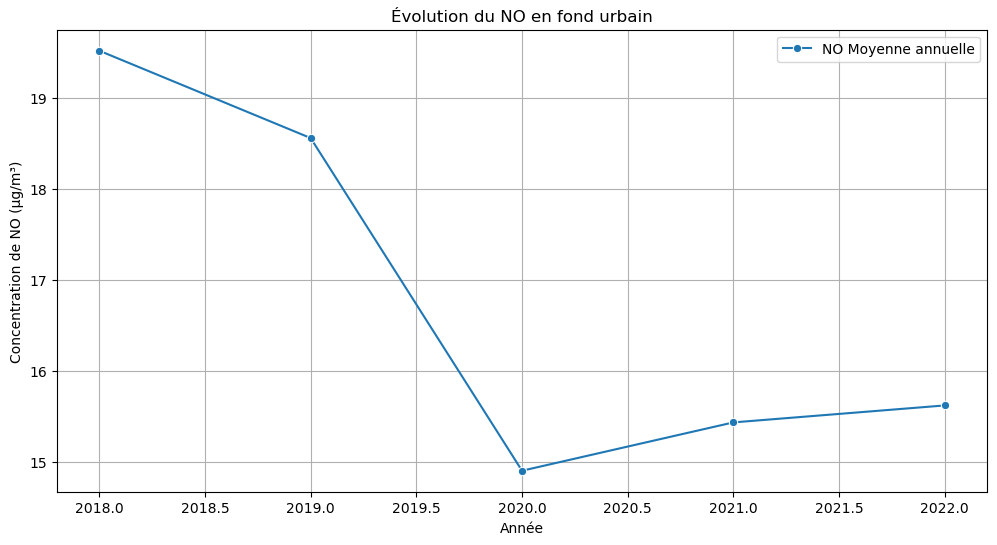

In [510]:


# Regrouper les donn√©es NO par ann√©e pour obtenir la moyenne annuelle
df_NO_grouped = df_NO.groupby("Ann√©e")["valeur"].mean().reset_index()
df_NO_grouped.rename(columns={"valeur": "NO Moyenne annuelle"}, inplace=True)

# Tracer l'√©volution du NO au fil des ann√©es
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_NO_grouped, x="Ann√©e", y="NO Moyenne annuelle", marker="o", label="NO Moyenne annuelle")

plt.xlabel("Ann√©e")
plt.ylabel("Concentration de NO (¬µg/m¬≥)")
plt.title("√âvolution du NO en fond urbain")
plt.legend()
plt.grid()
plt.show()


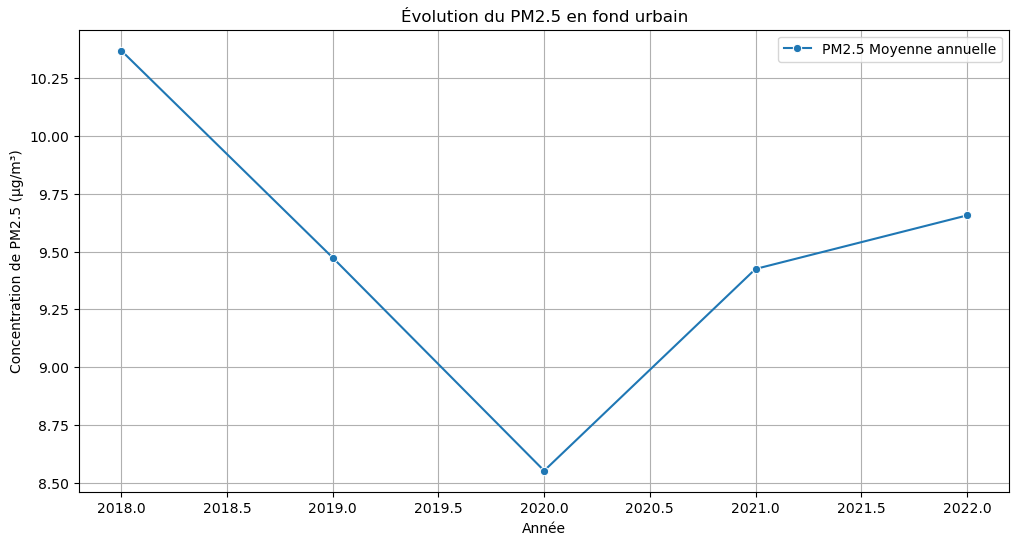

In [511]:


# Regrouper les donn√©es PM2.5 par ann√©e pour obtenir la moyenne annuelle
df_PM_grouped = df_PM.groupby("Ann√©e")["valeur"].mean().reset_index()
df_PM_grouped.rename(columns={"valeur": "PM2.5 Moyenne annuelle"}, inplace=True)

# Tracer l'√©volution du PM2.5 au fil des ann√©es
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_PM_grouped, x="Ann√©e", y="PM2.5 Moyenne annuelle", marker="o", label="PM2.5 Moyenne annuelle")

plt.xlabel("Ann√©e")
plt.ylabel("Concentration de PM2.5 (¬µg/m¬≥)")
plt.title("√âvolution du PM2.5 en fond urbain")
plt.legend()
plt.grid()
plt.show()


b) Analyser les corr√©lations entre les niveaux de polluants (PM2.5 et NO2) et les taux de mortalit√© 

   Mortalit√©  Ann√©e_x  PM2.5 Moyenne annuelle  NO Moyenne annuelle
0     760468     2019                9.473373            18.556355
1     729528     2020                8.551546            14.904878
2     726654     2021                9.424837            15.435323
3     762088     2022                9.656522            15.621554


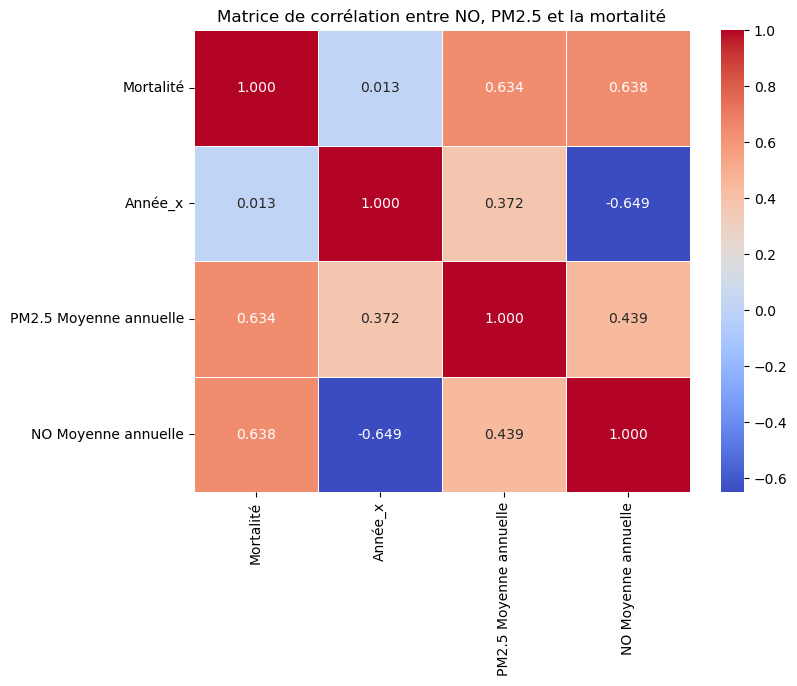

Corr√©lation entre NO et mortalit√© : 0.638
Corr√©lation entre PM2.5 et mortalit√© : 0.634


In [512]:


df_NO_grouped = df_NO.groupby("Ann√©e")["valeur"].mean().reset_index()
df_NO_grouped.rename(columns={"valeur": "NO Moyenne annuelle"}, inplace=True)


df_PM_grouped = df_PM.groupby("Ann√©e")["valeur"].mean().reset_index()
df_PM_grouped.rename(columns={"valeur": "PM2.5 Moyenne annuelle"}, inplace=True)

df_mort_sans_covid = df_mort[~df_mort["cause_initiale_de_deces"].str.contains("U071|U072|U109|U12918", na=False)]

# Regrouper les d√©c√®s par ann√©e
df_morta_grouped_sans_covid = df_mort_sans_covid.groupby("annee_de_deces")["effectif_de_deces"].sum().reset_index()

# Fusionner les donn√©es pollution et mortalit√©
df_comparaison = df_morta_grouped_sans_covid.merge(df_PM_grouped, left_on="annee_de_deces", right_on="Ann√©e")
df_comparaison = df_comparaison.merge(df_NO_grouped, left_on="annee_de_deces", right_on="Ann√©e")
df_comparaison.drop(columns=["Ann√©e_y"], inplace=True)  # √âviter la redondance
df_comparaison.drop(columns=["annee_de_deces"], inplace=True)  # √âviter la redondance


df_comparaison.rename(columns={"effectif_de_deces": "Mortalit√©"}, inplace=True)

# V√©rifier la structure des donn√©es apr√®s fusion
print(df_comparaison)

# Calculer la matrice de corr√©lation
corr_matrix = df_comparaison.corr()

# Afficher la heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".3f", linewidths=0.5)
plt.title("Matrice de corr√©lation entre NO, PM2.5 et la mortalit√©")
plt.show()

# Calcul des corr√©lations sp√©cifiques
correlation_no_mortalite = df_comparaison["NO Moyenne annuelle"].corr(df_comparaison["Mortalit√©"])
correlation_pm_mortalite = df_comparaison["PM2.5 Moyenne annuelle"].corr(df_comparaison["Mortalit√©"])

print(f"Corr√©lation entre NO et mortalit√© : {correlation_no_mortalite:.3f}")
print(f"Corr√©lation entre PM2.5 et mortalit√© : {correlation_pm_mortalite:.3f}")


In [513]:
df_mort = df_mort_sans_covid
df_mort

annee_de_deces  region_de_domicile classe_d_age_de_10_ans    sexe  \
0               2019                   1                  35-44  Hommes   
1               2020                   1                  35-44  Hommes   
2               2021                   1                  35-44  Hommes   
3               2022                   1                  35-44  Hommes   
4               2019                   2                  35-44  Hommes   
...              ...                 ...                    ...     ...   
9067            2022                  93                    95p  Femmes   
9068            2019                  94                    95p  Femmes   
9069            2020                  94                    95p  Femmes   
9070            2021                  94                    95p  Femmes   
9071            2022                  94                    95p  Femmes   

                     cause_initiale_de_deces  effectif_de_deces  
0     7. Maladies de l‚Äôappareil circulatoire                  3  
1     7. Maladies de l‚Äôappareil circulatoire                  4  
2     7. Maladies de l‚Äôappareil circulatoire                  6  
3     7. Maladies de l‚Äôappareil circulatoire                  4  
4     7. Maladies de l‚Äôappareil circulatoire                  1  
...                                      ...                ...  
9067                              2. Tumeurs                342  
9068                              2. Tumeurs                 10  
9069                              2. Tumeurs                 23  
9070                              2. Tumeurs                 27  
9071                              2. Tumeurs                 13  

[9072 rows x 6 columns]

c)	D√©terminer les diff√©rences entre groupes d√©mographiques.

  classe_d_age_de_10_ans  effectif_de_deces
0                  35-44              28204
1                  45-54             102634
2                  55-64             283720
3                  65-74             555778
4                  75-84             717420
5                  85-94            1021296
6                    95p             269686


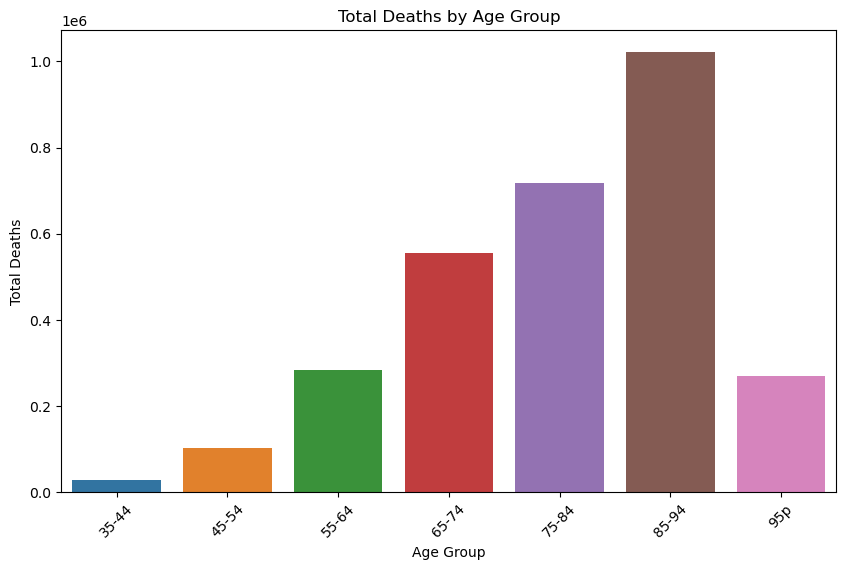

In [445]:
age_groups = df_mort.groupby('classe_d_age_de_10_ans').agg({'effectif_de_deces': 'sum'}).reset_index()

print(age_groups)
plt.figure(figsize=(10, 6))
sns.barplot(x='classe_d_age_de_10_ans', y='effectif_de_deces', data=age_groups)
plt.xticks(rotation=45)
plt.title("Total Deaths by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Total Deaths")
plt.show()




    region_de_domicile  effectif_de_deces
0                    1              15134
1                    2              15726
2                    3               3658
3                    4              24208
4                    6               2982
5                   11             358736
6                   24             131798
7                   27             143346
8                   28             171130
9                   32             272122
10                  44             263260
11                  52             178512
12                  53             178712
13                  75             324656
14                  76             295682
15                  84             336278
16                  93             246550
17                  94              16248


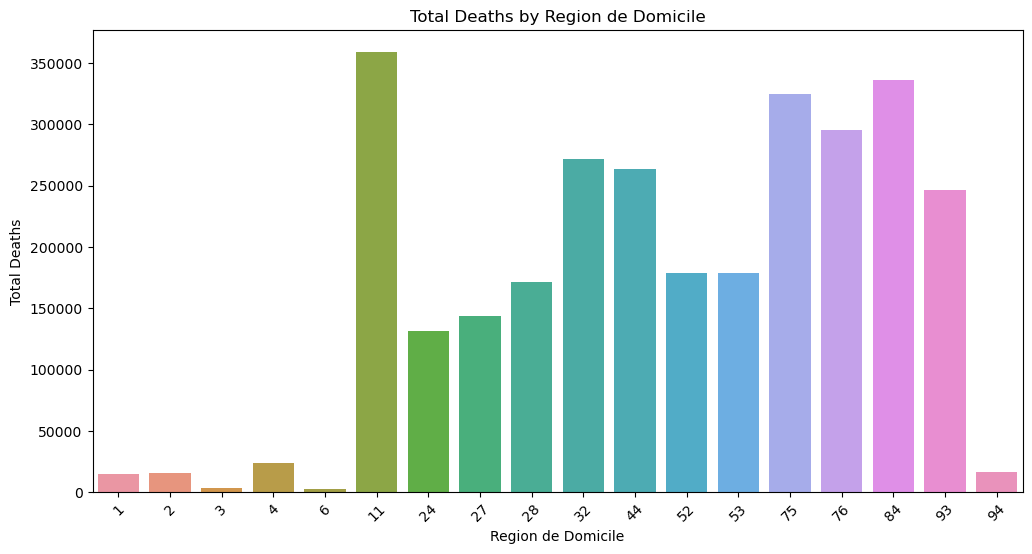

In [446]:
# Group the data by 'region_de_domicile' (region of residence) and calculate total deaths in each region
region_groups = df_mort.groupby('region_de_domicile').agg({'effectif_de_deces': 'sum'}).reset_index()

# Display the result
print(region_groups)

plt.figure(figsize=(12, 6))
sns.barplot(x='region_de_domicile', y='effectif_de_deces', data=region_groups)
plt.xticks(rotation=45)
plt.title("Total Deaths by Region de Domicile")
plt.xlabel("Region de Domicile")
plt.ylabel("Total Deaths")
plt.show()




         sexe  effectif_de_deces
0      Femmes             718276
1      Hommes             771093
2  Tous sexes            1489369


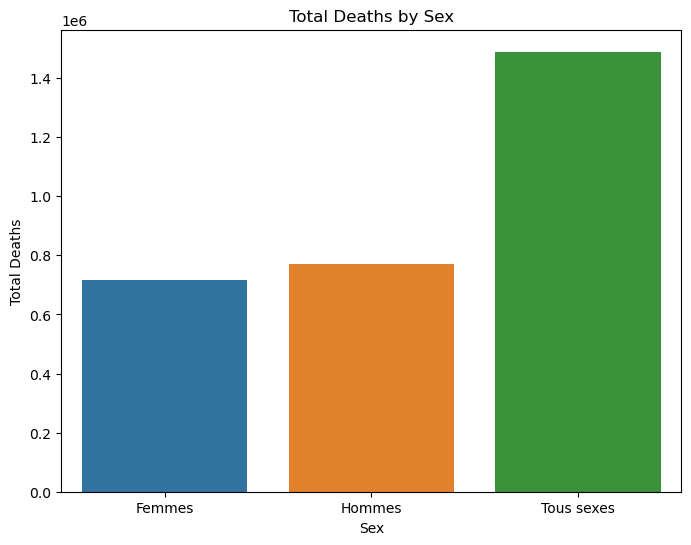

In [98]:
sex_groups = df_mort.groupby('sexe').agg({'effectif_de_deces': 'sum'}).reset_index()

print(sex_groups)
plt.figure(figsize=(8, 6))
sns.barplot(x='sexe', y='effectif_de_deces', data=sex_groups)
plt.title("Total Deaths by Sex")
plt.xlabel("Sex")
plt.ylabel("Total Deaths")
plt.show()



### 3.	Nettoyage et pr√©traitement

Cr√©er des fonctions pour chaque √©tape du nettoyage : 



a) Traiter les valeurs manquantes dans les donn√©es de pollution et de sant√© 

In [514]:
df_PM.isna().sum()

Date de d√©but             0
Date de fin               0
Organisme                 0
code zas                  0
Zas                       0
code site                 0
nom site                  0
type d'implantation       0
Polluant                  0
type d'influence          0
R√©glementaire             0
type d'√©valuation         0
type de valeur            0
valeur                    0
valeur brute              0
unit√© de mesure           0
taux de saisie           64
couverture temporelle    64
couverture de donn√©es    64
code qualit√©              0
validit√©                  0
Latitude                  0
Longitude                 0
Ann√©e                     0
dtype: int64

In [515]:
from sklearn.impute import KNNImputer


# Imputation des donn√©es num√©riques par KNN
knn_imputer = KNNImputer(n_neighbors=2)  # n_neighbors d√©termine le nombre de voisins √† consid√©rer

# S√©lectionner uniquement les colonnes num√©riques pour l'imputation
df_numeric = df_PM[['taux de saisie', 'couverture temporelle', 'couverture de donn√©es']]

# Appliquer l'imputation KNN
df_numeric_imputed = knn_imputer.fit_transform(df_numeric)

# Remplacer les colonnes avec les valeurs imput√©es dans le dataframe d'origine
df_PM[['taux de saisie', 'couverture temporelle', 'couverture de donn√©es']] = df_numeric_imputed

# Afficher le dataframe apr√®s l'imputation
df_PM.isna().sum()

Date de d√©but            0
Date de fin              0
Organisme                0
code zas                 0
Zas                      0
code site                0
nom site                 0
type d'implantation      0
Polluant                 0
type d'influence         0
R√©glementaire            0
type d'√©valuation        0
type de valeur           0
valeur                   0
valeur brute             0
unit√© de mesure          0
taux de saisie           0
couverture temporelle    0
couverture de donn√©es    0
code qualit√©             0
validit√©                 0
Latitude                 0
Longitude                0
Ann√©e                    0
dtype: int64

In [516]:
df_NO.isna().sum()

Date de d√©but              0
Date de fin                0
Organisme                  0
code zas                   0
Zas                        0
code site                  0
nom site                   0
type d'implantation        0
Polluant                   0
type d'influence           0
R√©glementaire              0
type d'√©valuation          0
type de valeur             0
valeur                     0
valeur brute               0
unit√© de mesure            0
taux de saisie           231
couverture temporelle    231
couverture de donn√©es    231
code qualit√©               0
validit√©                   0
Latitude                   0
Longitude                  0
Ann√©e                      0
dtype: int64

In [517]:
knn_imputer = KNNImputer(n_neighbors=2)  # n_neighbors d√©termine le nombre de voisins √† consid√©rer

# S√©lectionner uniquement les colonnes num√©riques pour l'imputation
df_numeric = df_NO[['taux de saisie', 'couverture temporelle', 'couverture de donn√©es']]

# Appliquer l'imputation KNN
df_numeric_imputed = knn_imputer.fit_transform(df_numeric)

# Remplacer les colonnes avec les valeurs imput√©es dans le dataframe d'origine
df_NO[['taux de saisie', 'couverture temporelle', 'couverture de donn√©es']] = df_numeric_imputed

df_NO.isna().sum()

Date de d√©but            0
Date de fin              0
Organisme                0
code zas                 0
Zas                      0
code site                0
nom site                 0
type d'implantation      0
Polluant                 0
type d'influence         0
R√©glementaire            0
type d'√©valuation        0
type de valeur           0
valeur                   0
valeur brute             0
unit√© de mesure          0
taux de saisie           0
couverture temporelle    0
couverture de donn√©es    0
code qualit√©             0
validit√©                 0
Latitude                 0
Longitude                0
Ann√©e                    0
dtype: int64

b) Harmoniser les formats de date, localisation entre les diff√©rentes sources de donn√©es


<class 'pandas.core.series.Series'>
Int64Index: 9072 entries, 0 to 9071
Series name: annee_de_deces
Non-Null Count  Dtype
--------------  -----
9072 non-null   int64
dtypes: int64(1)
memory usage: 141.8 KB


In [518]:
df_PM["Date de d√©but"] = pd.to_datetime(df_PM["Date de d√©but"], dayfirst=True, errors="coerce")
df_NO["Date de fin"] = pd.to_datetime(df_NO["Date de fin"], dayfirst=True, errors="coerce")
df_NO["Date de d√©but"] = pd.to_datetime(df_NO["Date de d√©but"], dayfirst=True, errors="coerce")
#df_PM["Ann√©e"] = pd.to_datetime(df_PM["Ann√©e"].astype(str), format="%Y", errors="coerce").dt.year
#df_NO["Ann√©e"] = pd.to_datetime(df_NO["Ann√©e"].astype(str) + "-01-01", errors="coerce").dt.normalize()
df_PM["Date de fin"] = pd.to_datetime(df_PM["Date de fin"], dayfirst=True, errors="coerce")
#df_mort["annee_de_deces"] = pd.to_datetime(df_mort["annee_de_deces"], format='%Y', errors="coerce")


df_NO

Date de d√©but         Date de fin                     Organisme  \
0      2022-01-01 2022-12-31 23:59:59                ATMO GRAND EST   
1      2022-01-01 2022-12-31 23:59:59                ATMO GRAND EST   
2      2022-01-01 2022-12-31 23:59:59                ATMO GRAND EST   
3      2022-01-01 2022-12-31 23:59:59                ATMO GRAND EST   
4      2022-01-01 2022-12-31 23:59:59                ATMO GRAND EST   
..            ...                 ...                           ...   
426    2018-01-01 2018-12-31 23:59:59  ATMO BOURGOGNE-FRANCHE-COMTE   
427    2018-01-01 2018-12-31 23:59:59  ATMO BOURGOGNE-FRANCHE-COMTE   
428    2018-01-01 2018-12-31 23:59:59  ATMO BOURGOGNE-FRANCHE-COMTE   
429    2018-01-01 2018-12-31 23:59:59  ATMO BOURGOGNE-FRANCHE-COMTE   
430    2018-01-01 2018-12-31 23:59:59  ATMO BOURGOGNE-FRANCHE-COMTE   

      code zas                         Zas code site             nom site  \
0    FR44ZAG02                    ZAG METZ   FR01011          Metz-Centre   
1    FR44ZAG02                    ZAG METZ   FR01012           Metz-Borny   
2    FR44ZRE01                ZR GRAND-EST   FR01016                Atton   
3    FR44ZAG02                    ZAG METZ   FR01018        Scy-Chazelles   
4    FR44ZAG02                    ZAG METZ   FR01019   Thionville-Piscine   
..         ...                         ...       ...                  ...   
426  FR27ZRE01  ZR BOURGOGNE-FRANCHE-COMTE   FR82040          Dole centre   
427  FR27ZRE01  ZR BOURGOGNE-FRANCHE-COMTE   FR82041               Tavaux   
428  FR27ZRE01  ZR BOURGOGNE-FRANCHE-COMTE   FR82042             Damparis   
429  FR27ZRE01  ZR BOURGOGNE-FRANCHE-COMTE   FR82050   Lons-le-Saunier CV   
430  FR27ZRE01  ZR BOURGOGNE-FRANCHE-COMTE   FR82060  Vesoul Pres Caillet   

        type d'implantation Polluant type d'influence  ... valeur brute  \
0                   Urbaine      NO2             Fond  ...    14.938581   
1                   Urbaine      NO2             Fond  ...    14.006147   
2    Rurale pr√®s des villes      NO2     Industrielle  ...    12.357746   
3               P√©riurbaine      NO2             Fond  ...    11.698373   
4                   Urbaine      NO2             Fond  ...    11.886899   
..                      ...      ...              ...  ...          ...   
426                 Urbaine      NO2             Fond  ...    12.116235   
427  Rurale pr√®s des villes      NO2     Industrielle  ...     9.244696   
428  Rurale pr√®s des villes      NO2     Industrielle  ...    13.297808   
429                 Urbaine      NO2             Fond  ...    11.878807   
430                 Urbaine      NO2             Fond  ...    12.789156   

    unit√© de mesure taux de saisie  couverture temporelle  \
0             ¬µg-m3      99.000000             100.000000   
1             ¬µg-m3      99.000000             100.000000   
2             ¬µg-m3      94.000000              96.000000   
3             ¬µg-m3      96.442013              95.915208   
4             ¬µg-m3      98.000000              98.000000   
..              ...            ...                    ...   
426           ¬µg-m3      98.000000              70.000000   
427           ¬µg-m3      95.000000              99.000000   
428           ¬µg-m3      96.000000              98.000000   
429           ¬µg-m3      98.000000              49.000000   
430           ¬µg-m3      99.000000              51.000000   

     couverture de donn√©es code qualit√©  validit√©   Latitude  Longitude Ann√©e  
0                99.000000            R         1  49.119442   6.180833  2022  
1                99.000000            R         1  49.110283   6.223336  2022  
2                90.000000            R         1  48.886387   6.093611  2022  
3                92.826039            R         1  49.107502   6.122775  2022  
4                96.000000            R         1  49.368610   6.160831  2022  
..                     ...          ...       ...        ...        ...   ...  
426         

In [106]:
df_PM.info()
df_NO.info()
df_mort.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 903 entries, 0 to 156
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Date de d√©but          903 non-null    datetime64[ns]
 1   Date de fin            903 non-null    datetime64[ns]
 2   Organisme              903 non-null    object        
 3   code zas               903 non-null    object        
 4   Zas                    903 non-null    object        
 5   code site              903 non-null    object        
 6   nom site               903 non-null    object        
 7   type d'implantation    903 non-null    object        
 8   Polluant               903 non-null    object        
 9   type d'influence       903 non-null    object        
 10  R√©glementaire          903 non-null    object        
 11  type d'√©valuation      903 non-null    object        
 12  type de valeur         903 non-null    object        
 13  va

c) G√©rer les incoh√©rences potentielles  

In [519]:
# 2. D√©tection des doublons
print("\nDoublons d√©tect√©s :")
print(df_NO[df_NO.duplicated()])
print(df_PM[df_PM.duplicated()])
print(df_mort[df_mort.duplicated()])

# 1. V√©rification des types de donn√©es
print("Types de donn√©es :")
print(df_NO.dtypes)
print(df_PM.dtypes)
print(df_mort.dtypes)

# Traitement des valeurs aberrantes pour df_PM
numerical_columns_PM = df_PM.select_dtypes(include=['float64', 'int64']).columns
for col in numerical_columns_PM:
    Q1 = df_PM[col].quantile(0.25)
    Q3 = df_PM[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # D√©tection des outliers
    outliers = df_PM[(df_PM[col] < lower_bound) | (df_PM[col] > upper_bound)]
    
    # Imputation des valeurs aberrantes par la m√©diane
    median_value = df_PM[col].median()
    df_PM[col] = df_PM[col].apply(lambda x: median_value if x < lower_bound or x > upper_bound else x)
    
    print(f"‚úîÔ∏è Les valeurs aberrantes de '{col}' ont √©t√© remplac√©es par la m√©diane ({median_value}).")

# Traitement des valeurs aberrantes pour df_NO
numerical_columns_NO = df_NO.select_dtypes(include=['float64', 'int64']).columns
for col in numerical_columns_NO:
    Q1 = df_NO[col].quantile(0.25)
    Q3 = df_NO[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # D√©tection des outliers
    outliers = df_NO[(df_NO[col] < lower_bound) | (df_NO[col] > upper_bound)]
    
    # Imputation des valeurs aberrantes par la m√©diane
    median_value = df_NO[col].median()
    df_NO[col] = df_NO[col].apply(lambda x: median_value if x < lower_bound or x > upper_bound else x)
    
    print(f"‚úîÔ∏è Les valeurs aberrantes de '{col}' ont √©t√© remplac√©es par la m√©diane ({median_value}).")

# Traitement des valeurs aberrantes pour df_mort
numerical_columns_mort = df_mort.select_dtypes(include=['float64', 'int64']).columns.drop("region_de_domicile", errors='ignore')
for col in numerical_columns_mort:
    Q1 = df_mort[col].quantile(0.25)
    Q3 = df_mort[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # D√©tection des outliers
    outliers = df_mort[(df_mort[col] < lower_bound) | (df_mort[col] > upper_bound)]
    
    # Imputation des valeurs aberrantes par la m√©diane
    median_value = df_mort[col].median()
    df_mort[col] = df_mort[col].apply(lambda x: median_value if x < lower_bound or x > upper_bound else x)
    
    print(f"‚úîÔ∏è Les valeurs aberrantes de '{col}' ont √©t√© remplac√©es par la m√©diane ({median_value}).")



Doublons d√©tect√©s :
Empty DataFrame
Columns: [Date de d√©but, Date de fin, Organisme, code zas, Zas, code site, nom site, type d'implantation, Polluant, type d'influence, R√©glementaire, type d'√©valuation, type de valeur, valeur, valeur brute, unit√© de mesure, taux de saisie, couverture temporelle, couverture de donn√©es, code qualit√©, validit√©, Latitude, Longitude, Ann√©e]
Index: []

[0 rows x 24 columns]
Empty DataFrame
Columns: [Date de d√©but, Date de fin, Organisme, code zas, Zas, code site, nom site, type d'implantation, Polluant, type d'influence, R√©glementaire, type d'√©valuation, type de valeur, valeur, valeur brute, unit√© de mesure, taux de saisie, couverture temporelle, couverture de donn√©es, code qualit√©, validit√©, Latitude, Longitude, Ann√©e]
Index: []

[0 rows x 24 columns]
Empty DataFrame
Columns: [annee_de_deces, region_de_domicile, classe_d_age_de_10_ans, sexe, cause_initiale_de_deces, effectif_de_deces]
Index: []
Types de donn√©es :
Date de d√©but         

C:\Users\hp\AppData\Roaming\Python\Python39\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


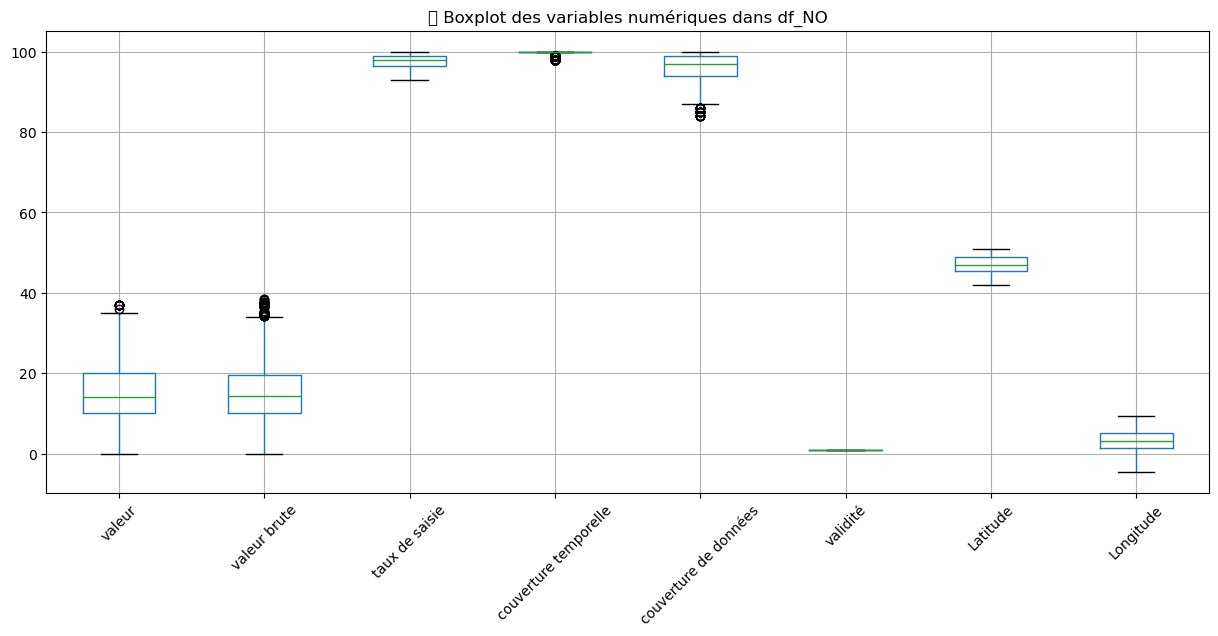

C:\Users\hp\AppData\Roaming\Python\Python39\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


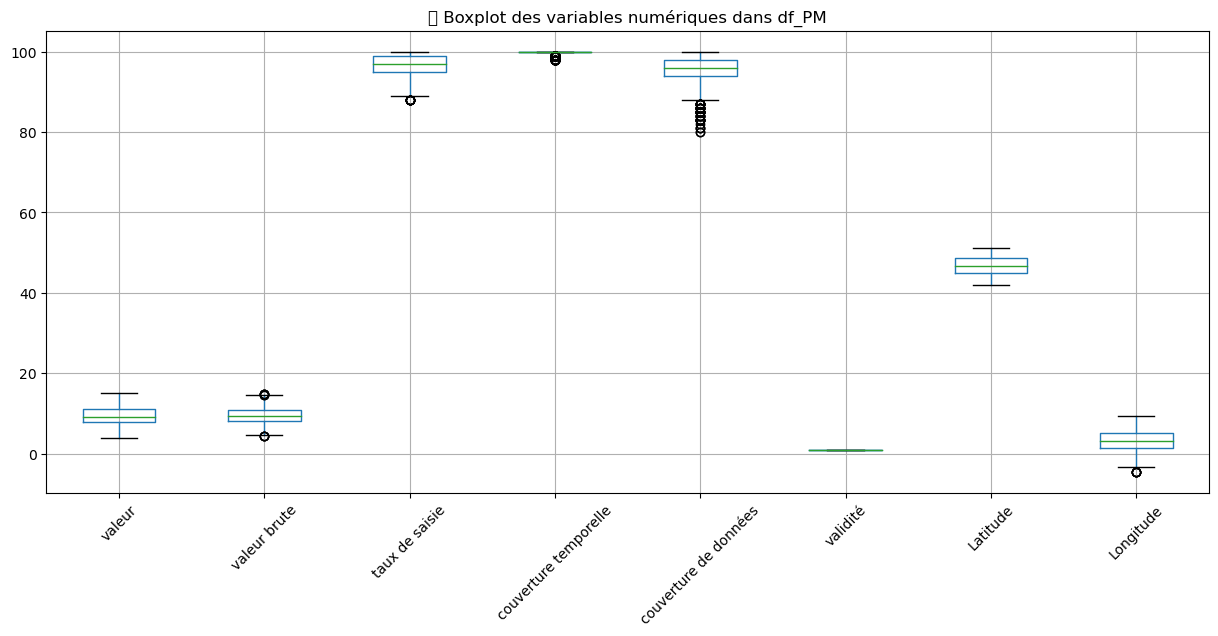

C:\Users\hp\AppData\Roaming\Python\Python39\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


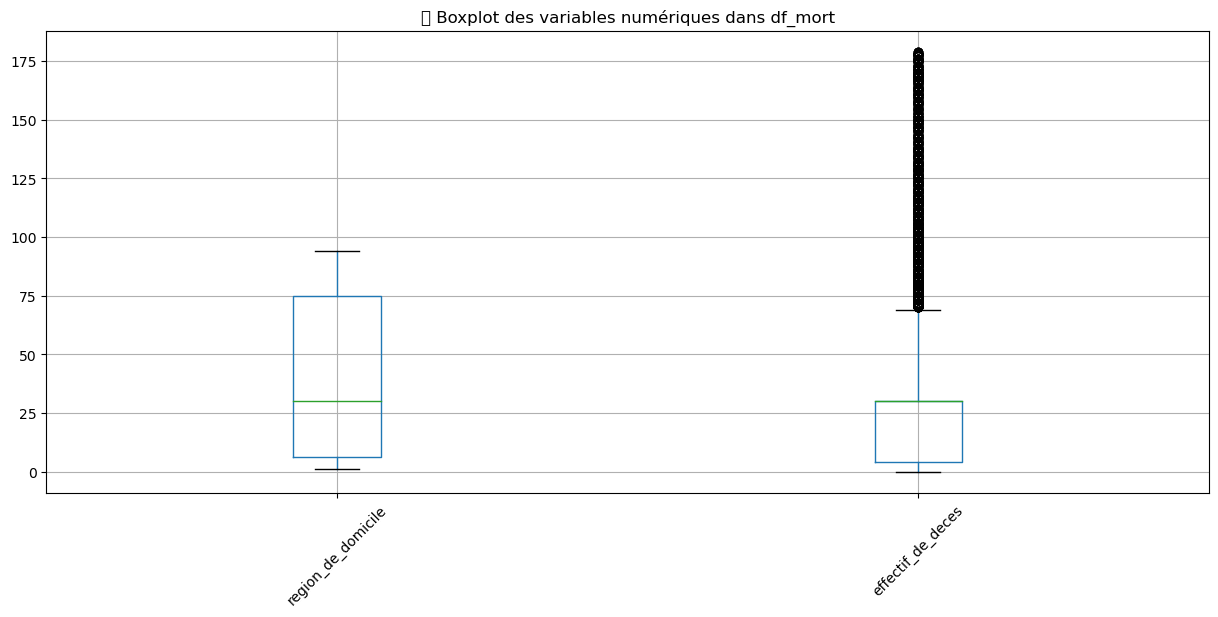

In [115]:


def plot_boxplots(df, df_name):
    numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns

    plt.figure(figsize=(15, 6))
    df[numerical_columns].boxplot(rot=45)
    plt.title(f"üìä Boxplot des variables num√©riques dans {df_name}")
    plt.show()

# Affichage des boxplots pour chaque dataframe
plot_boxplots(df_NO, "df_NO")
plot_boxplots(df_PM, "df_PM")
plot_boxplots(df_mort, "df_mort")


In [520]:
def check_outliers(df, df_name):
    numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
    outlier_counts = {}

    for col in numerical_columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
        outlier_counts[col] = len(outliers)

    print(f"\nüßê V√©rification des valeurs aberrantes dans {df_name} :")
    for col, count in outlier_counts.items():
        print(f"üìå Colonne '{col}': {count} valeurs aberrantes trouv√©es")
    
    if all(count == 0 for count in outlier_counts.values()):
        print(f"‚úÖ Aucune valeur aberrante d√©tect√©e dans {df_name} üéâ")
    else:
        print(f"‚ö†Ô∏è Des valeurs aberrantes subsistent dans {df_name}")

# V√©rification sur chaque dataframe
check_outliers(df_NO, "df_NO")
check_outliers(df_PM, "df_PM")
check_outliers(df_mort, "df_mort")



üßê V√©rification des valeurs aberrantes dans df_NO :
üìå Colonne 'valeur': 14 valeurs aberrantes trouv√©es
üìå Colonne 'valeur brute': 45 valeurs aberrantes trouv√©es
üìå Colonne 'taux de saisie': 0 valeurs aberrantes trouv√©es
üìå Colonne 'couverture temporelle': 346 valeurs aberrantes trouv√©es
üìå Colonne 'couverture de donn√©es': 28 valeurs aberrantes trouv√©es
üìå Colonne 'validit√©': 0 valeurs aberrantes trouv√©es
üìå Colonne 'Latitude': 0 valeurs aberrantes trouv√©es
üìå Colonne 'Longitude': 0 valeurs aberrantes trouv√©es
üìå Colonne 'Ann√©e': 0 valeurs aberrantes trouv√©es
‚ö†Ô∏è Des valeurs aberrantes subsistent dans df_NO

üßê V√©rification des valeurs aberrantes dans df_PM :
üìå Colonne 'valeur': 0 valeurs aberrantes trouv√©es
üìå Colonne 'valeur brute': 10 valeurs aberrantes trouv√©es
üìå Colonne 'taux de saisie': 10 valeurs aberrantes trouv√©es
üìå Colonne 'couverture temporelle': 178 valeurs aberrantes trouv√©es
üìå Colonne 'couverture de donn√©es': 48 v

In [455]:
from scipy.stats import zscore

def impute_outliers_zscore(df, threshold=3):
    # S√©lectionner les colonnes num√©riques
    numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
    
    for col in numerical_columns:
        # Calcul du Z-score pour la colonne
        df['zscore'] = zscore(df[col], nan_policy='omit')  # Calcul du Z-score
        
        # D√©tection des valeurs aberrantes (Z-score > seuil ou Z-score < -seuil)
        outliers = df[np.abs(df['zscore']) > threshold]
        
        # Afficher les valeurs aberrantes d√©tect√©es
        if not outliers.empty:
            print(f"‚ö†Ô∏è {len(outliers)} valeurs aberrantes trouv√©es dans '{col}' par Z-score")
        
        # Imputation des valeurs aberrantes par la m√©diane
        median_value = df[col].median()
        df[col] = df.apply(lambda row: median_value if np.abs(row['zscore']) > threshold else row[col], axis=1)
        
        print(f"‚úîÔ∏è Les valeurs aberrantes de '{col}' ont √©t√© remplac√©es par la m√©diane ({median_value}).")
        
        # Supprimer la colonne 'zscore' apr√®s traitement
        df.drop(columns=['zscore'], inplace=True)
    
    return df

# Ajuster le seuil Z-score si n√©cessaire
threshold_value = 2  # Diminue le seuil √† 2 pour √™tre plus strict
df_PM = impute_outliers_zscore(df_PM, threshold=threshold_value)
df_NO = impute_outliers_zscore(df_NO, threshold=threshold_value)
df_mort = impute_outliers_zscore(df_mort, threshold=threshold_value)

# Affichage des r√©sultats apr√®s ajustement des seuils
print("\nV√©rification des valeurs aberrantes apr√®s imputation et ajustement des seuils :")
print("df_PM apr√®s ajustement :")
print(df_PM.describe())  # Affiche les statistiques descriptives apr√®s imputation
print("df_NO apr√®s ajustement :")
print(df_NO.describe())
print("df_mort apr√®s ajustement :")
print(df_mort.describe())


‚ö†Ô∏è 33 valeurs aberrantes trouv√©es dans 'valeur' par Z-score
‚úîÔ∏è Les valeurs aberrantes de 'valeur' ont √©t√© remplac√©es par la m√©diane (9.0).
‚ö†Ô∏è 47 valeurs aberrantes trouv√©es dans 'valeur brute' par Z-score
‚úîÔ∏è Les valeurs aberrantes de 'valeur brute' ont √©t√© remplac√©es par la m√©diane (9.37428860503348).
‚ö†Ô∏è 35 valeurs aberrantes trouv√©es dans 'taux de saisie' par Z-score
‚úîÔ∏è Les valeurs aberrantes de 'taux de saisie' ont √©t√© remplac√©es par la m√©diane (97.0).
‚ö†Ô∏è 45 valeurs aberrantes trouv√©es dans 'couverture temporelle' par Z-score
‚úîÔ∏è Les valeurs aberrantes de 'couverture temporelle' ont √©t√© remplac√©es par la m√©diane (100.0).
‚ö†Ô∏è 47 valeurs aberrantes trouv√©es dans 'couverture de donn√©es' par Z-score
‚úîÔ∏è Les valeurs aberrantes de 'couverture de donn√©es' ont √©t√© remplac√©es par la m√©diane (96.0).
‚ö†Ô∏è 102 valeurs aberrantes trouv√©es dans 'validit√©' par Z-score
‚úîÔ∏è Les valeurs aberrantes de 'validit√©' ont √©t√© remplac√©

In [457]:
df_mort.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9072 entries, 0 to 9071
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   annee_de_deces           9072 non-null   int64  
 1   region_de_domicile       9072 non-null   int64  
 2   classe_d_age_de_10_ans   9072 non-null   object 
 3   sexe                     9072 non-null   object 
 4   cause_initiale_de_deces  9072 non-null   object 
 5   effectif_de_deces        9072 non-null   float64
dtypes: float64(1), int64(2), object(3)
memory usage: 496.1+ KB


d) Normaliser vos donn√©es

In [521]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import pandas as pd

# Initialiser l'encodeur pour les variables cat√©gorielles
encoder_maladie = OneHotEncoder(drop=None, sparse=False)
encoder_sexe = OneHotEncoder(drop=None, sparse=False)  # Ne pas supprimer de cat√©gorie pour garder 'femme'

# Encode la variable 'cause_initiale_de_deces'
encoded_maladie = encoder_maladie.fit_transform(df_mort[['cause_initiale_de_deces']])
df_encoded_maladie = pd.DataFrame(encoded_maladie, columns=encoder_maladie.get_feature_names_out(['cause_initiale_de_deces']))
df_mort = df_mort.join(df_encoded_maladie).drop(columns=['cause_initiale_de_deces'])

# Encode la variable 'sexe' sans supprimer de cat√©gorie
encoded_sexe = encoder_sexe.fit_transform(df_mort[['sexe']])
df_encoded_sexe = pd.DataFrame(encoded_sexe, columns=encoder_sexe.get_feature_names_out(['sexe']))
df_mort = df_mort.join(df_encoded_sexe).drop(columns=['sexe'])

# S√©lectionner toutes les colonnes num√©riques, sauf 'region_de_domicile' et 'annee_de_deces'
numerical_columns = df_mort.select_dtypes(include=['float64', 'int64']).columns
numerical_columns = numerical_columns[numerical_columns != 'region_de_domicile']
numerical_columns = numerical_columns[numerical_columns != 'annee_de_deces']

# Initialiser le scaler (ici StandardScaler, mais tu peux utiliser MinMaxScaler si tu pr√©f√®res)
scaler = StandardScaler()

# Normaliser toutes les colonnes num√©riques, sauf 'region_de_domicile' et 'annee_de_deces'
df_mort[numerical_columns] = scaler.fit_transform(df_mort[numerical_columns])

# Afficher le DataFrame final avec les variables num√©riques et cat√©gorielles normalis√©es
print(df_mort.head())



   annee_de_deces  region_de_domicile classe_d_age_de_10_ans  \
0            2019                   1                  35-44   
1            2020                   1                  35-44   
2            2021                   1                  35-44   
3            2022                   1                  35-44   
4            2019                   2                  35-44   

   effectif_de_deces  cause_initiale_de_deces_2. Tumeurs  \
0          -0.596423                           -0.447214   
1          -0.587008                           -0.447214   
2          -0.568179                           -0.447214   
3          -0.587008                           -0.447214   
4          -0.615253                           -0.447214   

   cause_initiale_de_deces_7. Maladies de l‚Äôappareil circulatoire  \
0                                           2.236068                
1                                           2.236068                
2                                           2

In [266]:
df_mort 

annee_de_deces  region_de_domicile classe_d_age_de_10_ans  \
0        2019-01-01                   1                  35-44   
1        2020-01-01                   1                  35-44   
2        2021-01-01                   1                  35-44   
3        2022-01-01                   1                  35-44   
4        2019-01-01                   2                  35-44   
...             ...                 ...                    ...   
9067     2022-01-01                  93                    95p   
9068     2019-01-01                  94                    95p   
9069     2020-01-01                  94                    95p   
9070     2021-01-01                  94                    95p   
9071     2022-01-01                  94                    95p   

      effectif_de_deces  cause_initiale_de_deces_2. Tumeurs  \
0             -0.550189                           -0.447214   
1             -0.543887                           -0.447214   
2             -0.531284                           -0.447214   
3             -0.543887                           -0.447214   
4             -0.562793                           -0.447214   
...                 ...                                 ...   
9067           1.586097                            2.236068   
9068          -0.506077                            2.236068   
9069          -0.424155                            2.236068   
9070          -0.398948                            2.236068   
9071          -0.487172                            2.236068   

      cause_initiale_de_deces_7. Maladies de l‚Äôappareil circulatoire  \
0                                              2.236068                
1                                              2.236068                
2                                              2.236068                
3                                              2.236068                
4                                              2.236068                
...                                                 ...                
9067                                          -0.447214                
9068                                          -0.447214                
9069                                          -0.447214                
9070                                          -0.447214                
9071                                          -0.447214                

      cause_initiale_de_deces_8. Maladies de l‚Äôappareil respiratoire  \
0                                             -0.447214                
1                                             -0.447214                
2                                             -0.447214                
3                                             -0.447214                
4                                             -0.447214                
...                                                 ...                
9067                                          -0.447214                
9068                                          -0.447214                
9069                                          -0.447214                
9070                                          -0.447214                
9071                                          -0.447214                

      cause_initiale_de_deces_8.2 Pneumonie  \
0                                 -0.447214   
1                                 -0.447214   
2                                 -0.447214   
3                                 -0.447214   
4                                 -0.447214   
...                                     ...   
9067                              -0.447214   
9068                              -0.447214   
9069                              -0.447214   
9070                              -0.447214   
9071                              -0.447214   

      cause_initiale_de_deces_8.3 Maladies chroniques des voies respiratoires inf√©rieures  \
0                                             -0.447214       

In [523]:

# S√©lectionner toutes les colonnes num√©riques, sauf 'ann√©e'
numerical_columns_PM = df_PM.select_dtypes(include=['float64', 'int64']).columns
numerical_columns_PM = numerical_columns_PM[numerical_columns_PM != 'Ann√©e']

# Initialiser le scaler
scaler = StandardScaler()

# Normaliser toutes les colonnes num√©riques sauf 'ann√©e'
df_PM[numerical_columns_PM] = scaler.fit_transform(df_PM[numerical_columns_PM])

# Afficher le DataFrame apr√®s normalisation
print(df_PM)



    Date de d√©but         Date de fin                     Organisme  \
0      2022-01-01 2022-12-31 23:59:59                ATMO GRAND EST   
1      2022-01-01 2022-12-31 23:59:59                ATMO GRAND EST   
2      2022-01-01 2022-12-31 23:59:59                ATMO GRAND EST   
3      2022-01-01 2022-12-31 23:59:59                      ATMO SUD   
4      2022-01-01 2022-12-31 23:59:59                      ATMO SUD   
..            ...                 ...                           ...   
152    2018-01-01 2018-12-31 23:59:59               QUALITAIR CORSE   
153    2018-01-01 2018-12-31 23:59:59  ATMO BOURGOGNE-FRANCHE-COMTE   
154    2018-01-01 2018-12-31 23:59:59  ATMO BOURGOGNE-FRANCHE-COMTE   
155    2018-01-01 2018-12-31 23:59:59  ATMO BOURGOGNE-FRANCHE-COMTE   
156    2018-01-01 2018-12-31 23:59:59  ATMO BOURGOGNE-FRANCHE-COMTE   

      code zas                         Zas code site              nom site  \
0    FR44ZAG02                    ZAG METZ   FR01011           Metz-

In [524]:
df_PM

Date de d√©but         Date de fin                     Organisme  \
0      2022-01-01 2022-12-31 23:59:59                ATMO GRAND EST   
1      2022-01-01 2022-12-31 23:59:59                ATMO GRAND EST   
2      2022-01-01 2022-12-31 23:59:59                ATMO GRAND EST   
3      2022-01-01 2022-12-31 23:59:59                      ATMO SUD   
4      2022-01-01 2022-12-31 23:59:59                      ATMO SUD   
..            ...                 ...                           ...   
152    2018-01-01 2018-12-31 23:59:59               QUALITAIR CORSE   
153    2018-01-01 2018-12-31 23:59:59  ATMO BOURGOGNE-FRANCHE-COMTE   
154    2018-01-01 2018-12-31 23:59:59  ATMO BOURGOGNE-FRANCHE-COMTE   
155    2018-01-01 2018-12-31 23:59:59  ATMO BOURGOGNE-FRANCHE-COMTE   
156    2018-01-01 2018-12-31 23:59:59  ATMO BOURGOGNE-FRANCHE-COMTE   

      code zas                         Zas code site              nom site  \
0    FR44ZAG02                    ZAG METZ   FR01011           Metz-Centre   
1    FR44ZAG02                    ZAG METZ   FR01020     Thionville-Centre   
2    FR44ZRE01                ZR GRAND-EST   FR01065  Belleville sur Meuse   
3    FR93ZAG01           ZAG MARSEILLE-AIX   FR02008    Port de Bouc Leque   
4    FR93ZAG01           ZAG MARSEILLE-AIX   FR02013      Fos Les Carabins   
..         ...                         ...       ...                   ...   
152  FR94ZRE01                    ZR CORSE   FR41024                VENACO   
153  FR27ZAR03                ZAR BESANCON   FR82006   Besancon Prevoyance   
154  FR27ZAR01     ZAR BELFORT-MONTBELIARD   FR82010    Montb√©liard centre   
155  FR27ZRE01  ZR BOURGOGNE-FRANCHE-COMTE   FR82050    Lons-le-Saunier CV   
156  FR27ZRE01  ZR BOURGOGNE-FRANCHE-COMTE   FR82070       Baume-les-Dames   

    type d'implantation Polluant type d'influence  ... valeur brute  \
0               Urbaine    PM2.5             Fond  ...     0.732797   
1               Urbaine    PM2.5             Fond  ...    -0.903547   
2               Urbaine    PM2.5           Trafic  ...    -0.032424   
3               Urbaine    PM2.5     Industrielle  ...     0.050036   
4           P√©riurbaine    PM2.5     Industrielle  ...     0.263485   
..                  ...      ...              ...  ...          ...   
152    Rurale r√©gionale    PM2.5             Fond  ...    -2.029983   
153             Urbaine    PM2.5             Fond  ...     1.287242   
154             Urbaine    PM2.5             Fond  ...     0.855867   
155             Urbaine    PM2.5             Fond  ...     0.338299   
156             Urbaine    PM2.5           Trafic  ...     0.332510   

    unit√© de mesure taux de saisie  couverture temporelle  \
0             ¬µg-m3       0.132807               0.462659   
1             ¬µg-m3      -1.474974              -1.436345   
2             ¬µg-m3      -0.269139               0.462659   
3             ¬µg-m3       0.936697               0.462659   
4             ¬µg-m3       0.534752               0.462659   
..              ...            ...                    ...   
152           ¬µg-m3       0.132807              -1.436345   
153           ¬µg-m3       0.132807               0.462659   
154           ¬µg-m3       0.132807              -1.436345   
155           ¬µg-m3       0.936697               0.462659   
156           ¬µg-m3       0.534752               0.462659   

     couverture de donn√©es code qualit√©  validit√©  Latitude  Longitude Ann√©e  
0                -2.671968            R       0.0  1.018544   1.149010  2022  
1                -0.867838            R       0.0  1.124007   1.140238  2022  
2                 0.163094            R       0.0  1.039883   0.857711  2022  
3                 0.936292            R       0.0 -1.505508   0.708810  2022  
4                -1.641037            R       0.0 -1.480356   0.691426  2022  
..                     ...          ...       ...       ...        ...   ...  
152              -2.414235            R       0.0 -2.020

In [525]:
# S√©lectionner toutes les colonnes num√©riques, sauf 'Ann√©e'
numerical_columns = df_NO.select_dtypes(include=['float64', 'int64']).columns
numerical_columns = numerical_columns[numerical_columns != 'Ann√©e']

# Initialiser le scaler
scaler = StandardScaler()

# Normaliser toutes les colonnes num√©riques sauf 'Ann√©e'
df_NO[numerical_columns] = scaler.fit_transform(df_NO[numerical_columns])

# Afficher le DataFrame apr√®s normalisation
df_NO 


Date de d√©but         Date de fin                     Organisme  \
0      2022-01-01 2022-12-31 23:59:59                ATMO GRAND EST   
1      2022-01-01 2022-12-31 23:59:59                ATMO GRAND EST   
2      2022-01-01 2022-12-31 23:59:59                ATMO GRAND EST   
3      2022-01-01 2022-12-31 23:59:59                ATMO GRAND EST   
4      2022-01-01 2022-12-31 23:59:59                ATMO GRAND EST   
..            ...                 ...                           ...   
426    2018-01-01 2018-12-31 23:59:59  ATMO BOURGOGNE-FRANCHE-COMTE   
427    2018-01-01 2018-12-31 23:59:59  ATMO BOURGOGNE-FRANCHE-COMTE   
428    2018-01-01 2018-12-31 23:59:59  ATMO BOURGOGNE-FRANCHE-COMTE   
429    2018-01-01 2018-12-31 23:59:59  ATMO BOURGOGNE-FRANCHE-COMTE   
430    2018-01-01 2018-12-31 23:59:59  ATMO BOURGOGNE-FRANCHE-COMTE   

      code zas                         Zas code site             nom site  \
0    FR44ZAG02                    ZAG METZ   FR01011          Metz-Centre   
1    FR44ZAG02                    ZAG METZ   FR01012           Metz-Borny   
2    FR44ZRE01                ZR GRAND-EST   FR01016                Atton   
3    FR44ZAG02                    ZAG METZ   FR01018        Scy-Chazelles   
4    FR44ZAG02                    ZAG METZ   FR01019   Thionville-Piscine   
..         ...                         ...       ...                  ...   
426  FR27ZRE01  ZR BOURGOGNE-FRANCHE-COMTE   FR82040          Dole centre   
427  FR27ZRE01  ZR BOURGOGNE-FRANCHE-COMTE   FR82041               Tavaux   
428  FR27ZRE01  ZR BOURGOGNE-FRANCHE-COMTE   FR82042             Damparis   
429  FR27ZRE01  ZR BOURGOGNE-FRANCHE-COMTE   FR82050   Lons-le-Saunier CV   
430  FR27ZRE01  ZR BOURGOGNE-FRANCHE-COMTE   FR82060  Vesoul Pres Caillet   

        type d'implantation Polluant type d'influence  ... valeur brute  \
0                   Urbaine      NO2             Fond  ...    -0.060293   
1                   Urbaine      NO2             Fond  ...    -0.179088   
2    Rurale pr√®s des villes      NO2     Industrielle  ...    -0.389098   
3               P√©riurbaine      NO2             Fond  ...    -0.473104   
4                   Urbaine      NO2             Fond  ...    -0.449085   
..                      ...      ...              ...  ...          ...   
426                 Urbaine      NO2             Fond  ...    -0.419867   
427  Rurale pr√®s des villes      NO2     Industrielle  ...    -0.785709   
428  Rurale pr√®s des villes      NO2     Industrielle  ...    -0.269332   
429                 Urbaine      NO2             Fond  ...    -0.450116   
430                 Urbaine      NO2             Fond  ...    -0.334135   

    unit√© de mesure taux de saisie  couverture temporelle  \
0             ¬µg-m3       0.710558               0.421454   
1             ¬µg-m3       0.710558               0.421454   
2             ¬µg-m3      -2.254787               0.421454   
3             ¬µg-m3      -0.806505               0.421454   
4             ¬µg-m3       0.117489              -3.710802   
..              ...            ...                    ...   
426           ¬µg-m3       0.117489               0.421454   
427           ¬µg-m3      -1.661718              -1.644674   
428           ¬µg-m3      -1.068649              -3.710802   
429           ¬µg-m3       0.117489               0.421454   
430           ¬µg-m3       0.710558               0.421454   

     couverture de donn√©es code qualit√©  validit√©  Latitude  Longitude Ann√©e  
0                 0.790963            R       0.0  1.024800   1.093555  2022  
1                 0.790963            R       0.0  1.020607   1.108664  2022  
2                -2.051707            R       0.0  0.918124   1.062549  2022  
3                -1.159096            R       0.0  1.019334   1.072916  2022  
4                -0.156594            R       0.0  1.138851   1.086445  2022  
..                     ...          ...       ...       ...        ...   ...  
426               0

In [462]:
df_mort.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9072 entries, 0 to 9071
Data columns (total 13 columns):
 #   Column                                                                               Non-Null Count  Dtype  
---  ------                                                                               --------------  -----  
 0   annee_de_deces                                                                       9072 non-null   int64  
 1   region_de_domicile                                                                   9072 non-null   int64  
 2   classe_d_age_de_10_ans                                                               9072 non-null   object 
 3   effectif_de_deces                                                                    9072 non-null   float64
 4   cause_initiale_de_deces_2. Tumeurs                                                   9072 non-null   float64
 5   cause_initiale_de_deces_7. Maladies de l‚Äôappareil circulatoire                       907

### 4.	Analyse exploratoire

a) Cr√©er des visualisations montrant les variations de la pollution et des d√©c√®s pour des p√©riodes similaires.


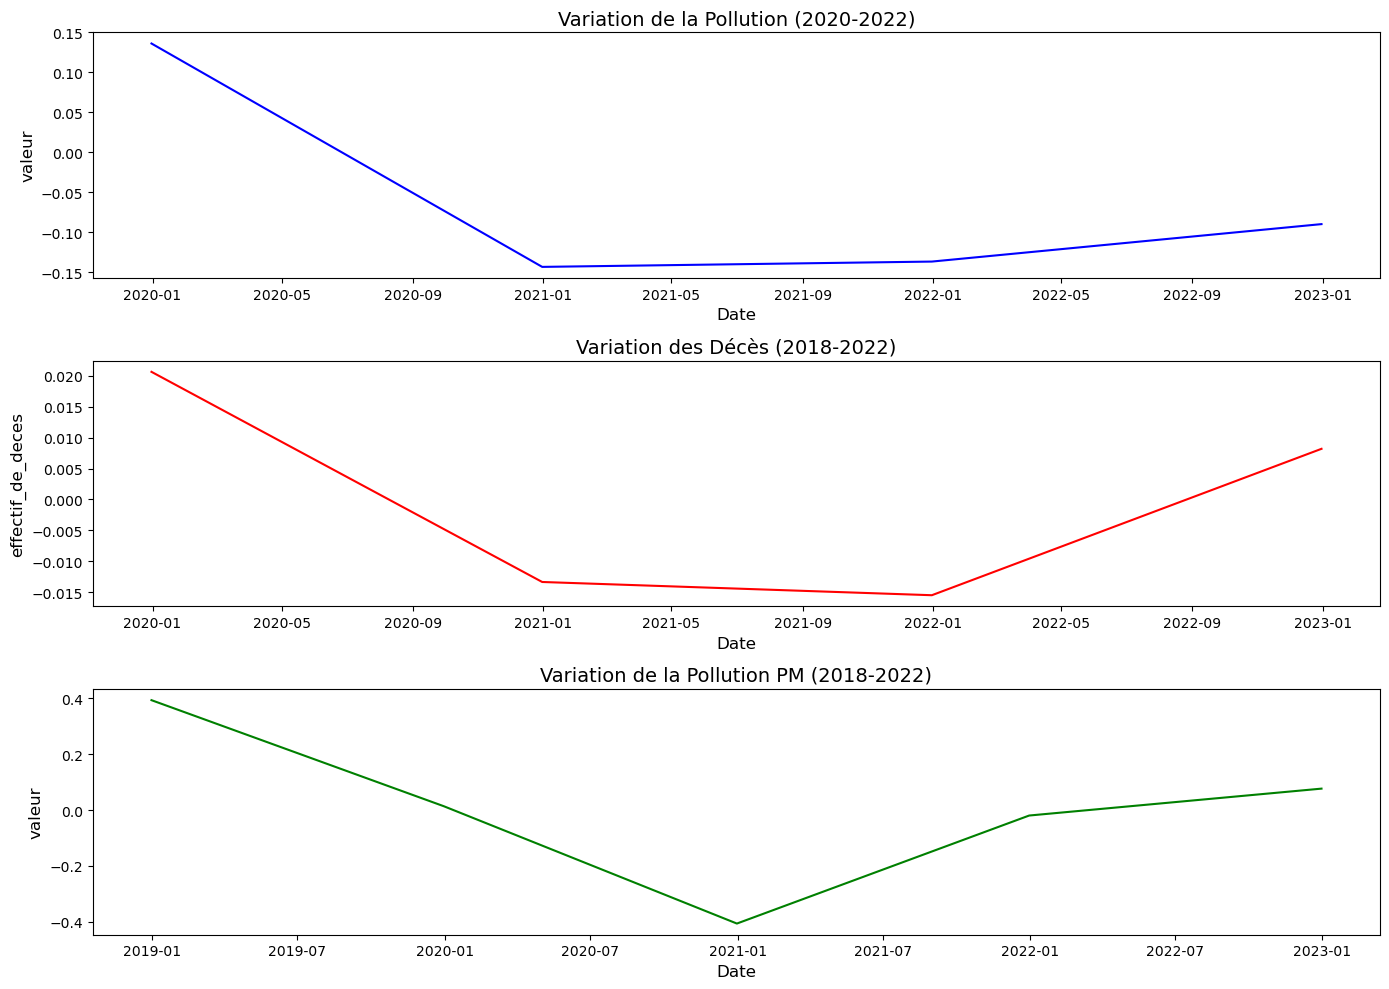

In [530]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

def preprocess_and_plot(df, date_column, value_column, start_year, end_year, plot_title, color):
    """
    Cette fonction traite les donn√©es en fonction des param√®tres donn√©s et g√©n√®re un graphique des tendances.
    
    Arguments :
    - df : DataFrame √† traiter
    - date_column : colonne de la date
    - value_column : colonne des valeurs √† afficher
    - start_year : ann√©e de d√©but pour le filtrage
    - end_year : ann√©e de fin pour le filtrage
    - plot_title : titre du graphique
    - color : couleur de la ligne du graphique
    """
    # Conversion de la colonne de date en datetime
    df[date_column] = pd.to_datetime(df[date_column], format='%Y')

    # Filtrage des donn√©es entre start_year et end_year
    df_filtered = df[(df[date_column].dt.year >= start_year) & (df[date_column].dt.year <= end_year)]
    
    # Agr√©gation par ann√©e
    df_monthly = df_filtered.resample('Y', on=date_column).mean()  # Moyenne annuelle des valeurs

    # Visualisation des donn√©es
    sns.lineplot(data=df_monthly, x=df_monthly.index, y=value_column, color=color)
    plt.title(plot_title, fontsize=14)
    plt.xlabel('Date', fontsize=12)
    plt.ylabel(value_column, fontsize=12)

def plot_pollution_and_deaths(df_NO, df_mort, df_PM):
    """
    Cette fonction g√©n√®re les graphiques de variation de la pollution et des d√©c√®s.
    
    Arguments :
    - df_NO : DataFrame de pollution
    - df_mort : DataFrame des d√©c√®s
    - df_PM : DataFrame de pollution PM
    """
    # Cr√©ation de la figure
    plt.figure(figsize=(14, 10))

    # Pollution (df_NO)
    plt.subplot(3, 1, 1)
    preprocess_and_plot(df_NO, 'Ann√©e', 'valeur', 2019, 2022, 'Variation de la Pollution (2020-2022)', 'blue')

 # Pollution PM (df_PM)
    plt.subplot(3, 1, 3)
    preprocess_and_plot(df_PM, 'Ann√©e', 'valeur', 2018, 2022, 'Variation de la Pollution PM (2018-2022)', 'green')
    
    # D√©c√®s (df_mort)
    plt.subplot(3, 1, 2)
    preprocess_and_plot(df_mort, 'annee_de_deces', 'effectif_de_deces', 2018, 2022, 'Variation des D√©c√®s (2018-2022)', 'red')

   

    # Ajuster l'affichage
    plt.tight_layout()
    plt.show()

# Appel de la fonction pour g√©n√©rer les graphiques
plot_pollution_and_deaths(df_NO, df_mort, df_PM)



b) Analyser les corr√©lations entre les variables de pollution et les donn√©es de mortalit√©


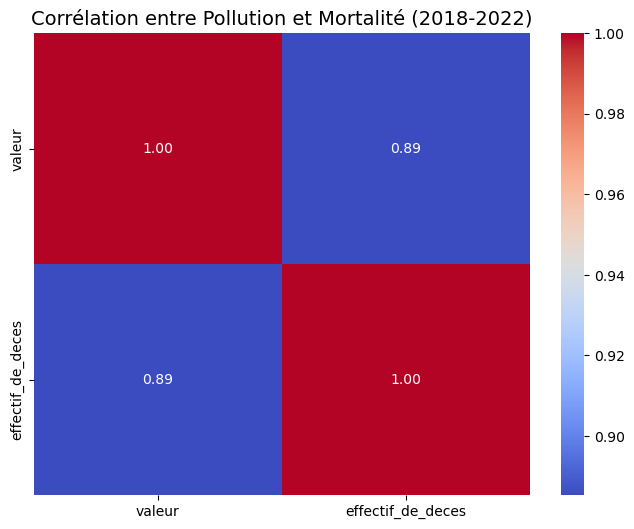

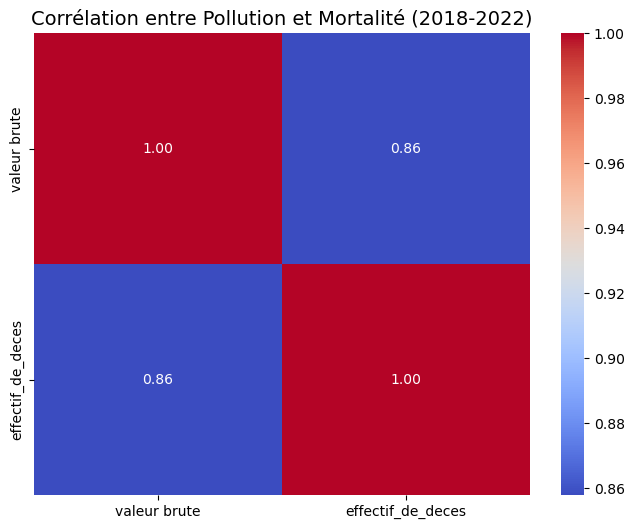

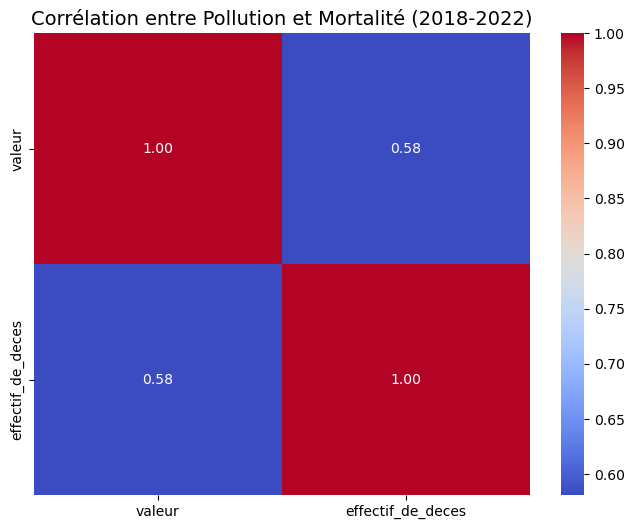

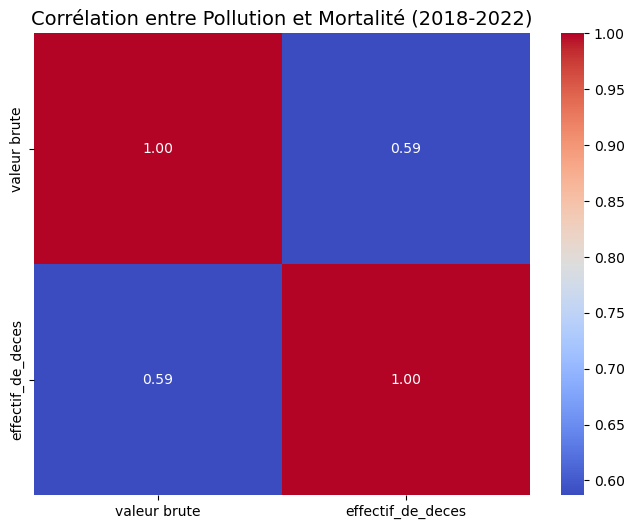

                   valeur brute  effectif_de_deces
valeur brute           1.000000           0.586909
effectif_de_deces      0.586909           1.000000


In [542]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Fonction de pr√©paration des donn√©es et de calcul de corr√©lation
def prepare_and_correlate(df_pollution, df_mortality, pollution_column, mortality_column, start_year, end_year):
    """
    Pr√©pare les donn√©es et calcule la corr√©lation entre la pollution et la mortalit√©.
    
    Arguments :
    - df_pollution : DataFrame contenant les donn√©es de pollution
    - df_mortality : DataFrame contenant les donn√©es de mortalit√©
    - pollution_column : colonne des valeurs de pollution (ex : 'valeur')
    - mortality_column : colonne des valeurs de mortalit√© (ex : 'effectif_de_deces')
    - start_year : ann√©e de d√©but pour le filtrage
    - end_year : ann√©e de fin pour le filtrage
    
    Retourne la matrice de corr√©lation et affiche une carte thermique.
    """
    # Conversion des dates en datetime
    df_pollution['Ann√©e'] = pd.to_datetime(df_pollution['Ann√©e'], format='%Y')
    df_mortality['annee_de_deces'] = pd.to_datetime(df_mortality['annee_de_deces'], format='%Y')

    # Filtrage des donn√©es entre start_year et end_year
    df_pollution_filtered = df_pollution[(df_pollution['Ann√©e'].dt.year >= start_year) & (df_pollution['Ann√©e'].dt.year <= end_year)]
    df_mortality_filtered = df_mortality[(df_mortality['annee_de_deces'].dt.year >= start_year) & (df_mortality['annee_de_deces'].dt.year <= end_year)]

    # Agr√©gation par ann√©e
    df_pollution_aggregated = df_pollution_filtered.resample('Y', on='Ann√©e').mean()  # Moyenne annuelle des valeurs de pollution
    df_mortality_aggregated = df_mortality_filtered.resample('Y', on='annee_de_deces').sum()  # Total annuel des d√©c√®s

    # Fusion des deux DataFrames sur l'ann√©e
    df_merged = pd.merge(df_pollution_aggregated, df_mortality_aggregated, left_index=True, right_index=True)

    # Calcul de la corr√©lation de Pearson entre Pollution et D√©c√®s
    correlation_matrix = df_merged[[pollution_column, mortality_column]].corr()

    # Visualisation de la matrice de corr√©lation avec une carte thermique
    plt.figure(figsize=(8, 6))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar=True)
    plt.title(f'Corr√©lation entre Pollution et Mortalit√© ({start_year}-{end_year})', fontsize=14)
    plt.show()

    return correlation_matrix

# Appel de la fonction avec les DataFrames df_NO (pollution) et df_mort (mortalit√©)
correlation_matrix = prepare_and_correlate(df_NO, df_mort, 'valeur', 'effectif_de_deces', 2018, 2022)
correlation_matrix = prepare_and_correlate(df_NO, df_mort, 'valeur brute', 'effectif_de_deces', 2018, 2022)
correlation_matrix = prepare_and_correlate(df_PM, df_mort, 'valeur', 'effectif_de_deces', 2018, 2022)
correlation_matrix = prepare_and_correlate(df_PM, df_mort, 'valeur brute', 'effectif_de_deces', 2018, 2022)



# Affichage de la matrice de corr√©lation
print(correlation_matrix)


In [539]:
df_NO.columns

Index(['Date de d√©but', 'Date de fin', 'Organisme', 'code zas', 'Zas',
       'code site', 'nom site', 'type d'implantation', 'Polluant',
       'type d'influence', 'R√©glementaire', 'type d'√©valuation',
       'type de valeur', 'valeur', 'valeur brute', 'unit√© de mesure',
       'taux de saisie', 'couverture temporelle', 'couverture de donn√©es',
       'code qualit√©', 'validit√©', 'Latitude', 'Longitude', 'Ann√©e'],
      dtype='object')

### 5.	Ing√©nierie des caract√©ristiques

a)	√âcrire des fonctions qui calculent les variables d√©riv√©es (moyennes des polluants)

In [544]:
import pandas as pd

def moyenne_polluant_par_annee(df, polluant_colonne, colonne_annee):
    
    
    # Calculer la moyenne par ann√©e
    df_grouped = df.groupby("Ann√©e")['valeur'].mean().reset_index()
    df_grouped.rename(columns={polluant_colonne: f"{polluant_colonne} Moyenne annuelle"}, inplace=True)
    
    return df_grouped


# Exemple d'utilisation pour les polluants NO et PM2.5
df_PM_grouped = moyenne_polluant_par_annee(df_PM, "valeur ", "Ann√©e")
df_NO_grouped = moyenne_polluant_par_annee(df_NO, "valeur ", "Ann√©e")

# Afficher les r√©sultats
print(df_PM_grouped.head())
print(df_NO_grouped.head())


       Ann√©e    valeur
0 2018-01-01  0.393963
1 2019-01-01  0.013878
2 2020-01-01 -0.406702
3 2021-01-01 -0.019509
4 2022-01-01  0.076902
       Ann√©e    valeur
0 2018-01-01  0.215206
1 2019-01-01  0.136183
2 2020-01-01 -0.143325
3 2021-01-01 -0.136676
4 2022-01-01 -0.089812


b)	Int√©grer des donn√©es m√©t√©orologiques si disponibles en utilisant une API m√©t√©o (comme OpenWeatherMap)

In [545]:
import requests
import pandas as pd

def obtenir_donnees_meteo(api_key, lat, lon, alt, start_date, end_date):
    """
    R√©cup√®re les donn√©es m√©t√©o mensuelles de l'API Meteostat via RapidAPI et retourne un DataFrame Pandas.
    """
    url = "https://meteostat.p.rapidapi.com/point/monthly"
    querystring = {
        "lat": str(lat),
        "lon": str(lon),
        "alt": str(alt),
        "start": start_date,
        "end": end_date
    }
    headers = {
        "x-rapidapi-key": api_key,
        "x-rapidapi-host": "meteostat.p.rapidapi.com"
    }

    # Requ√™te API
    response = requests.get(url, headers=headers, params=querystring)

    if response.status_code == 200:
        data = response.json()
        
        if "data" in data:
            df = pd.DataFrame(data["data"])
            
            # üõ† Convertir la colonne "date" en format datetime
            df["date"] = pd.to_datetime(df["date"])
            
            # üè∑ Renommer les colonnes pour plus de clart√©
            df.rename(columns={
                "tavg": "Temp√©rature Moyenne (¬∞C)",
                "tmin": "Temp√©rature Min (¬∞C)",
                "tmax": "Temp√©rature Max (¬∞C)",
                "prcp": "Pr√©cipitations (mm)",
                "wspd": "Vitesse du Vent (km/h)",
                "pres": "Pression Atmosph√©rique (hPa)",
                "tsun": "Ensoleillement (h)"
            }, inplace=True)
            
            return df
        else:
            print("‚ùå Donn√©es non disponibles.")
            return None
    else:
        print(f"‚ö†Ô∏è Erreur API: {response.status_code}, {response.text}")
        return None

# üîπ **Exemple d'utilisation :**
api_key = "7a0b745d25msh6379d51568a72ecp1ee407jsn212852273106"  # üîë Remplace avec ta cl√© RapidAPI
latitude = 43.2965  # üìç Marseille
longitude = 5.3698
altitude = 35  # En m√®tres
date_debut = "2018-01-01"
date_fin = "2022-12-31"

# üìä R√©cup√©ration des donn√©es de 2018 √† 2022
df_meteo = obtenir_donnees_meteo(api_key, latitude, longitude, altitude, date_debut, date_fin)

# üîç Aper√ßu des donn√©es
if df_meteo is not None:
    print(df_meteo.head())




        date  Temp√©rature Moyenne (¬∞C)  Temp√©rature Min (¬∞C)  \
0 2018-01-01                      10.6                   6.7   
1 2018-02-01                       5.6                   2.1   
2 2018-03-01                      10.8                   6.5   
3 2018-04-01                      16.0                  10.9   
4 2018-05-01                      18.4                  13.9   

   Temp√©rature Max (¬∞C)  Pr√©cipitations (mm)  Vitesse du Vent (km/h)  \
0                  14.8                 85.3                    17.5   
1                   9.4                 23.0                    18.2   
2                  15.2                 46.7                     NaN   
3                  21.1                 74.0                     NaN   
4                  23.4                 53.8                    13.3   

   Pression Atmosph√©rique (hPa)  Ensoleillement (h)  
0                        1018.6                 NaN  
1                        1012.1                 NaN  
2           

In [546]:
if df_meteo is not None:
    # üè∑ Ajouter une colonne "Ann√©e"
    df_meteo["Ann√©e"] = df_meteo["date"].dt.year

    # üìä Calculer la moyenne, la max et la min par ann√©e
    stats_annuelles = df_meteo.groupby("Ann√©e").agg({
        "Temp√©rature Moyenne (¬∞C)": "mean",
        "Temp√©rature Min (¬∞C)": "min",
        "Temp√©rature Max (¬∞C)": "max"
    }).reset_index()

    # üñ• Afficher les r√©sultats
    print(stats_annuelles)


   Ann√©e  Temp√©rature Moyenne (¬∞C)  Temp√©rature Min (¬∞C)  Temp√©rature Max (¬∞C)
0   2018                 16.475000                   2.1                  32.7
1   2019                 16.025000                   1.9                  32.4
2   2020                 16.108333                   4.9                  31.5
3   2021                 15.541667                   2.8                  30.6
4   2022                 17.091667                   0.3                  33.7


In [400]:
sites_marseille = df_NO[df_NO["nom site"].str.contains("Marseille", case=False, na=False)]
sites_marseille["Ann√©e"]

11   2022-01-01 00:00:00-01:00
12   2022-01-01 00:00:00-01:00
16   2022-01-01 00:00:00-01:00
11   2021-01-01 00:00:00-01:00
12   2021-01-01 00:00:00-01:00
16   2021-01-01 00:00:00-01:00
15   2020-01-01 00:00:00-01:00
16   2020-01-01 00:00:00-01:00
20   2020-01-01 00:00:00-01:00
18   2019-01-01 00:00:00-01:00
19   2019-01-01 00:00:00-01:00
24   2019-01-01 00:00:00-01:00
18   2018-01-01 00:00:00-01:00
19   2018-01-01 00:00:00-01:00
24   2018-01-01 00:00:00-01:00
Name: Ann√©e, dtype: datetime64[ns, pytz.FixedOffset(-60)]

In [547]:
sites_marseille

Date de d√©but         Date de fin Organisme   code zas                Zas  \
11    2022-01-01 2022-12-31 23:59:59  ATMO SUD  FR93ZAG01  ZAG MARSEILLE-AIX   
12    2022-01-01 2022-12-31 23:59:59  ATMO SUD  FR93ZAG01  ZAG MARSEILLE-AIX   
16    2022-01-01 2022-12-31 23:59:59  ATMO SUD  FR93ZAG01  ZAG MARSEILLE-AIX   
11    2021-01-01 2021-12-31 23:59:59  ATMO SUD  FR93ZAG01  ZAG MARSEILLE-AIX   
12    2021-01-01 2021-12-31 23:59:59  ATMO SUD  FR93ZAG01  ZAG MARSEILLE-AIX   
16    2021-01-01 2021-12-31 23:59:59  ATMO SUD  FR93ZAG01  ZAG MARSEILLE-AIX   
15    2020-01-01 2020-12-31 23:59:59  ATMO SUD  FR93ZAG01  ZAG MARSEILLE-AIX   
16    2020-01-01 2020-12-31 23:59:59  ATMO SUD  FR93ZAG01  ZAG MARSEILLE-AIX   
20    2020-01-01 2020-12-31 23:59:59  ATMO SUD  FR93ZAG01  ZAG MARSEILLE-AIX   
18    2019-01-01 2019-12-31 23:59:59  ATMO SUD  FR93ZAG01  ZAG MARSEILLE-AIX   
19    2019-01-01 2019-12-31 23:59:59  ATMO SUD  FR93ZAG01  ZAG MARSEILLE-AIX   
24    2019-01-01 2019-12-31 23:59:59  ATMO SUD  FR93ZAG01  ZAG MARSEILLE-AIX   
18    2018-01-01 2018-12-31 23:59:59  ATMO SUD  FR93ZAG01  ZAG MARSEILLE-AIX   
19    2018-01-01 2018-12-31 23:59:59  ATMO SUD  FR93ZAG01  ZAG MARSEILLE-AIX   
24    2018-01-01 2018-12-31 23:59:59  ATMO SUD  FR93ZAG01  ZAG MARSEILLE-AIX   

   code site             nom site type d'implantation Polluant  \
11   FR03006    MARSEILLE RABATAU             Urbaine      NO2   
12   FR03014   MARSEILLE ST LOUIS             Urbaine      NO2   
16   FR03043  MARSEILLE 5 AVENUES             Urbaine      NO2   
11   FR03006    MARSEILLE RABATAU             Urbaine      NO2   
12   FR03014   MARSEILLE ST LOUIS             Urbaine      NO2   
16   FR03043  MARSEILLE 5 AVENUES             Urbaine      NO2   
15   FR03006    MARSEILLE RABATAU             Urbaine      NO2   
16   FR03014   MARSEILLE ST LOUIS             Urbaine      NO2   
20   FR03043  MARSEILLE 5 AVENUES             Urbaine      NO2   
18   FR03006    MARSEILLE RABATAU             Urbaine      NO2   
19   FR03014   MARSEILLE ST LOUIS             Urbaine      NO2   
24   FR03043  MARSEILLE 5 AVENUES             Urbaine      NO2   
18   FR03006    MARSEILLE RABATAU             Urbaine      NO2   
19   FR03014   MARSEILLE ST LOUIS             Urbaine      NO2   
24   FR03043  MARSEILLE 5 AVENUES             Urbaine      NO2   

   type d'influence  ... valeur brute unit√© de mesure taux de saisie  \
11           Trafic  ...    -0.251363           ¬µg-m3       0.398477   
12             Fond  ...     1.403962           ¬µg-m3       0.554255   
16             Fond  ...     0.607116           ¬µg-m3       0.086922   
11           Trafic  ...    -0.251363           ¬µg-m3       0.398477   
12             Fond  ...     1.498493           ¬µg-m3       0.398477   
16             Fond  ...     0.817176           ¬µg-m3       0.086922   
15           Trafic  ...     1.789329           ¬µg-m3       0.398477   
16             Fond  ...     1.284064           ¬µg-m3       0.398477   
20             Fond  ...     0.483008           ¬µg-m3       0.242700   
18           Trafic  ...    -0.251363           ¬µg-m3      -0.068856   
19             Fond  ...     1.534018           ¬µg-m3       0.398477   
24             Fond  ...     0.887169           ¬µg-m3      -0.068856   
18           Trafic  ...    -0.251363           ¬µg-m3       0.398477   
19             Fond  ...     1.585269           ¬µg-m3       0.554255   
24             Fond  ...     0.859415           ¬µg-m3       0.242700   

    couverture temporelle  couverture de donn√©es code qualit√©  validit√©  \
11               0.267084               0.328117            R  0.270101   
12               0.267084               0.454951            R  0.270101   
16               0.267084               0.264700            R  0.270101   
11               0.267084               0.391534            R  0.270101   
12               0.201699               0.328117            R  0.270101   
16               0.201699               0.

In [550]:
# Convert df_meteo['date'] to the same timezone as sites_marseille['date']
df_fusion = pd.merge(sites_marseille, stats_annuelles, on="Ann√©e", how="left")




In [549]:
df_fusion

Date de d√©but         Date de fin Organisme   code zas                Zas  \
0     2022-01-01 2022-12-31 23:59:59  ATMO SUD  FR93ZAG01  ZAG MARSEILLE-AIX   
1     2022-01-01 2022-12-31 23:59:59  ATMO SUD  FR93ZAG01  ZAG MARSEILLE-AIX   
2     2022-01-01 2022-12-31 23:59:59  ATMO SUD  FR93ZAG01  ZAG MARSEILLE-AIX   
3     2021-01-01 2021-12-31 23:59:59  ATMO SUD  FR93ZAG01  ZAG MARSEILLE-AIX   
4     2021-01-01 2021-12-31 23:59:59  ATMO SUD  FR93ZAG01  ZAG MARSEILLE-AIX   
5     2021-01-01 2021-12-31 23:59:59  ATMO SUD  FR93ZAG01  ZAG MARSEILLE-AIX   
6     2020-01-01 2020-12-31 23:59:59  ATMO SUD  FR93ZAG01  ZAG MARSEILLE-AIX   
7     2020-01-01 2020-12-31 23:59:59  ATMO SUD  FR93ZAG01  ZAG MARSEILLE-AIX   
8     2020-01-01 2020-12-31 23:59:59  ATMO SUD  FR93ZAG01  ZAG MARSEILLE-AIX   
9     2019-01-01 2019-12-31 23:59:59  ATMO SUD  FR93ZAG01  ZAG MARSEILLE-AIX   
10    2019-01-01 2019-12-31 23:59:59  ATMO SUD  FR93ZAG01  ZAG MARSEILLE-AIX   
11    2019-01-01 2019-12-31 23:59:59  ATMO SUD  FR93ZAG01  ZAG MARSEILLE-AIX   
12    2018-01-01 2018-12-31 23:59:59  ATMO SUD  FR93ZAG01  ZAG MARSEILLE-AIX   
13    2018-01-01 2018-12-31 23:59:59  ATMO SUD  FR93ZAG01  ZAG MARSEILLE-AIX   
14    2018-01-01 2018-12-31 23:59:59  ATMO SUD  FR93ZAG01  ZAG MARSEILLE-AIX   

   code site             nom site type d'implantation Polluant  \
0    FR03006    MARSEILLE RABATAU             Urbaine      NO2   
1    FR03014   MARSEILLE ST LOUIS             Urbaine      NO2   
2    FR03043  MARSEILLE 5 AVENUES             Urbaine      NO2   
3    FR03006    MARSEILLE RABATAU             Urbaine      NO2   
4    FR03014   MARSEILLE ST LOUIS             Urbaine      NO2   
5    FR03043  MARSEILLE 5 AVENUES             Urbaine      NO2   
6    FR03006    MARSEILLE RABATAU             Urbaine      NO2   
7    FR03014   MARSEILLE ST LOUIS             Urbaine      NO2   
8    FR03043  MARSEILLE 5 AVENUES             Urbaine      NO2   
9    FR03006    MARSEILLE RABATAU             Urbaine      NO2   
10   FR03014   MARSEILLE ST LOUIS             Urbaine      NO2   
11   FR03043  MARSEILLE 5 AVENUES             Urbaine      NO2   
12   FR03006    MARSEILLE RABATAU             Urbaine      NO2   
13   FR03014   MARSEILLE ST LOUIS             Urbaine      NO2   
14   FR03043  MARSEILLE 5 AVENUES             Urbaine      NO2   

   type d'influence  ... couverture temporelle couverture de donn√©es  \
0            Trafic  ...              0.267084              0.328117   
1              Fond  ...              0.267084              0.454951   
2              Fond  ...              0.267084              0.264700   
3            Trafic  ...              0.267084              0.391534   
4              Fond  ...              0.201699              0.328117   
5              Fond  ...              0.201699              0.201283   
6            Trafic  ...              0.267084              0.391534   
7              Fond  ...              0.267084              0.391534   
8              Fond  ...              0.267084              0.328117   
9            Trafic  ...              0.267084              0.201283   
10             Fond  ...              0.267084              0.391534   
11             Fond  ...              0.201699              0.137866   
12           Trafic  ...              0.267084              0.391534   
13             Fond  ...              0.267084              0.454951   
14             Fond  ...              0.267084              0.328117   

   code qualit√©  validit√©  Latitude Longitude  Ann√©e  \
0             R  0.270101 -0.015225  0.178342   2022   
1             R  0.270101 -0.009961  0.175871   2022   
2             R  0.270101 -0.013105  0.178167   2022   
3             R  0.270101 -0.015225  0.178342   2021   
4             R  0.270101 -0.009961  0.175871   2021   
5             R  0.270101 -0.013105  0.178167   2021   
6             R  0.270101 -0.015225  0.178342   2020   
7             R  0.270101 -0.009961  0.175871   2020   
8  

### 6.	R√©duction de dimensionnalit√©

a)	Appliquer des techniques de r√©duction de dimensionnalit√© sur les donn√©es de pollution

In [415]:
df_NO.columns

Index(['Date de d√©but', 'Date de fin', 'Organisme', 'code zas', 'Zas',
       'code site', 'nom site', 'type d'implantation', 'Polluant',
       'type d'influence', 'R√©glementaire', 'type d'√©valuation',
       'type de valeur', 'valeur', 'valeur brute', 'unit√© de mesure',
       'taux de saisie', 'couverture temporelle', 'couverture de donn√©es',
       'code qualit√©', 'validit√©', 'Latitude', 'Longitude', 'Ann√©e'],
      dtype='object')

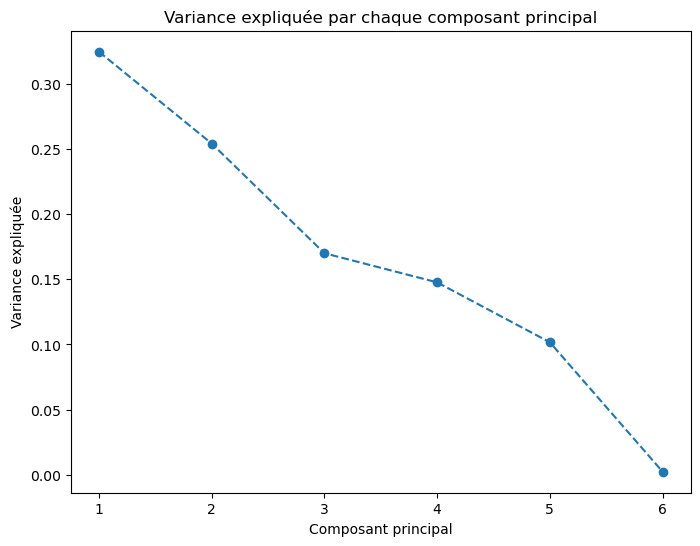

       PCA1      PCA2      PCA3
0 -0.100919  0.094240  0.631416
1 -0.265864  0.134033  0.622697
2 -0.453311  1.563566  2.581656
3 -0.577287  0.863863  1.650992
4 -0.602635  0.384028  1.094238


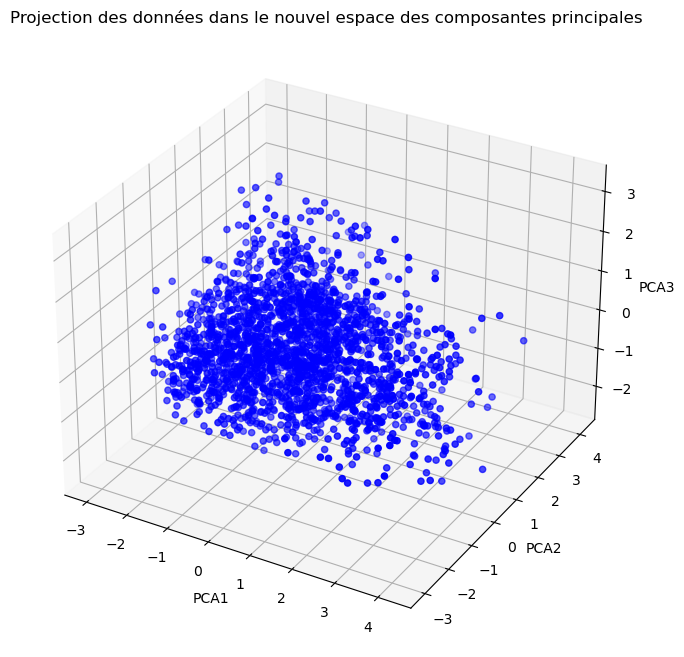

In [573]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns


# S√©lectionner les colonnes pertinentes pour la PCA
colonnes_pca = ['valeur', 'valeur brute', 'taux de saisie', 'Latitude', 'Longitude', 'Ann√©e']
df_pca = df_NO[colonnes_pca]

# √âtape 4 : Appliquer PCA pour r√©duire √† un nombre optimal de dimensions
pca = PCA()
pca.fit(df_pca)

# Visualiser la variance expliqu√©e par chaque composant principal
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_, marker='o', linestyle='--')
plt.title('Variance expliqu√©e par chaque composant principal')
plt.xlabel('Composant principal')
plt.ylabel('Variance expliqu√©e')
plt.show()

# S√©lectionner le nombre de composantes (par exemple, en prenant les 3 premiers composantes)
pca = PCA(n_components=3)
pca_result = pca.fit_transform(df_pca_normalise)

# Cr√©er un DataFrame avec les r√©sultats du PCA
df_pca_result = pd.DataFrame(pca_result, columns=['PCA1', 'PCA2', 'PCA3'])

# Afficher les r√©sultats du PCA
print(df_pca_result.head())

# Visualiser les r√©sultats du PCA dans un graphique 3D
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Tracer les 3 premiers composants PCA
ax.scatter(df_pca_result['PCA1'], df_pca_result['PCA2'], df_pca_result['PCA3'], c='b', marker='o')

ax.set_xlabel('PCA1')
ax.set_ylabel('PCA2')
ax.set_zlabel('PCA3')

plt.title('Projection des donn√©es dans le nouvel espace des composantes principales')
plt.show()


In [568]:
df_pca_result

PCA1      PCA2      PCA3
0    -0.100919  0.094240  0.631416
1    -0.265864  0.134033  0.622697
2    -0.453311  1.563566  2.581656
3    -0.577287  0.863863  1.650992
4    -0.602635  0.384028  1.094238
...        ...       ...       ...
2054 -0.170058  0.335441 -0.513053
2055 -0.604948  1.221182  0.675229
2056  0.069474  0.834205  0.298777
2057 -0.184045  0.458439 -0.639732
2058 -0.002010  0.068782 -0.764668

[2059 rows x 3 columns]

In [577]:
df_NO_reset = df_NO.reset_index(drop=True)
df_pca_result_reset = df_pca_result.reset_index(drop=True)

# Maintenant, concat√©ner les DataFrames
df_meteo_pca = pd.concat([df_NO_reset, df_pca_result_reset], axis=1)

# Afficher le r√©sultat
print(df_meteo_pca.head())

  Date de d√©but         Date de fin       Organisme   code zas           Zas  \
0    2022-01-01 2022-12-31 23:59:59  ATMO GRAND EST  FR44ZAG02      ZAG METZ   
1    2022-01-01 2022-12-31 23:59:59  ATMO GRAND EST  FR44ZAG02      ZAG METZ   
2    2022-01-01 2022-12-31 23:59:59  ATMO GRAND EST  FR44ZRE01  ZR GRAND-EST   
3    2022-01-01 2022-12-31 23:59:59  ATMO GRAND EST  FR44ZAG02      ZAG METZ   
4    2022-01-01 2022-12-31 23:59:59  ATMO GRAND EST  FR44ZAG02      ZAG METZ   

  code site            nom site     type d'implantation Polluant  \
0   FR01011         Metz-Centre                 Urbaine      NO2   
1   FR01012          Metz-Borny                 Urbaine      NO2   
2   FR01016               Atton  Rurale pr√®s des villes      NO2   
3   FR01018       Scy-Chazelles             P√©riurbaine      NO2   
4   FR01019  Thionville-Piscine                 Urbaine      NO2   

  type d'influence  ... couverture temporelle couverture de donn√©es  \
0             Fond  ...            

In [578]:
print(f"Explained variance ratio: {pca.explained_variance_ratio_}")


Explained variance ratio: [0.34477607 0.20011788 0.17460446]


b)	G√©n√©rer des visualisations des composantes principales

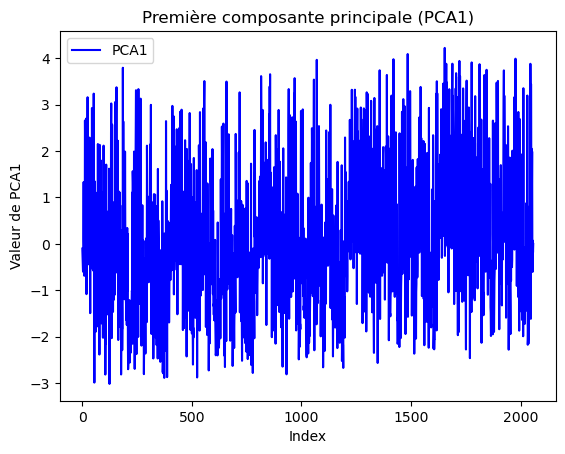

In [555]:
import matplotlib.pyplot as plt

# Visualiser la premi√®re composante principale (PC1)
plt.plot(df_meteo_pca['PCA1'], label='PCA1', color='blue')
plt.title('Premi√®re composante principale (PCA1)')
plt.xlabel('Index')
plt.ylabel('Valeur de PCA1')
plt.legend()
plt.show()


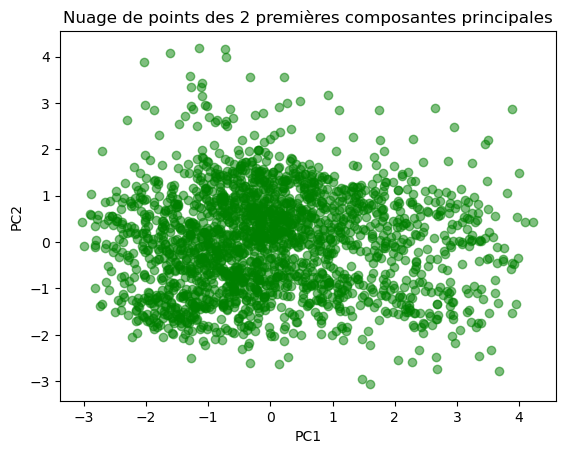

In [556]:
plt.scatter(df_meteo_pca['PCA1'], df_meteo_pca['PCA2'], alpha=0.5, color='green')
plt.title('Nuage de points des 2 premi√®res composantes principales')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()


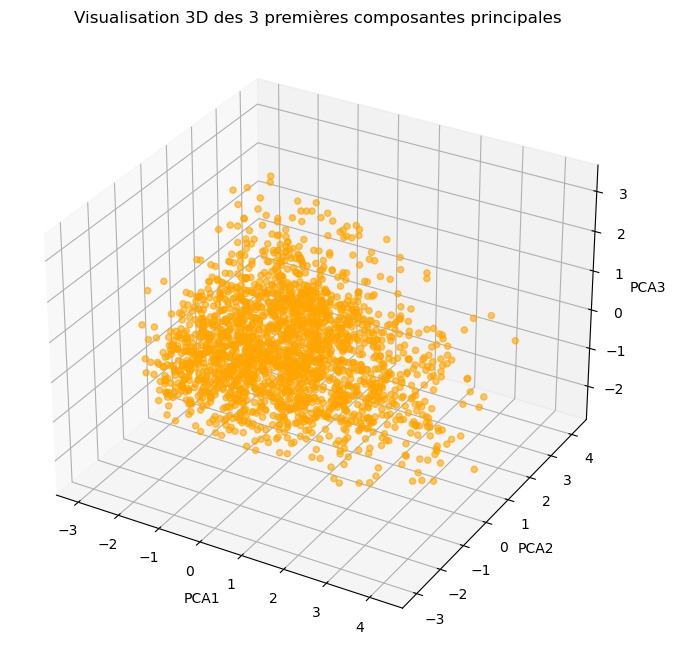

In [557]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Utiliser les 3 premi√®res composantes principales pour les axes
ax.scatter(df_meteo_pca['PCA1'], df_meteo_pca['PCA2'], df_meteo_pca['PCA3'], c='orange', alpha=0.6)

ax.set_xlabel('PCA1')
ax.set_ylabel('PCA2')
ax.set_zlabel('PCA3')

plt.title('Visualisation 3D des 3 premi√®res composantes principales')
plt.show()



### 7.	√âvaluation et interpr√©tation

a)	√âvaluer les impacts de la pollution sur la mortalit√© en utilisant les dimensions r√©duites 

In [579]:
# Exemple d'ajout des donn√©es de mortalit√©
df_mort['Ann√©e'] = pd.to_datetime(df_mort['annee_de_deces']).dt.year  # On s'assure que l'ann√©e est bien extraite

df_combined = pd.merge(df_meteo_pca, df_mort[['Ann√©e', 'effectif_de_deces']], on='Ann√©e', how='inner')
correlation_matrix = df_combined[['PCA1', 'PCA2', 'PCA3', 'effectif_de_deces']].corr()

print(correlation_matrix)




                       PCA1      PCA2      PCA3  effectif_de_deces
PCA1               1.000000  0.043731  0.043265           0.001937
PCA2               0.043731  1.000000 -0.029211          -0.000704
PCA3               0.043265 -0.029211  1.000000          -0.001234
effectif_de_deces  0.001937 -0.000704 -0.001234           1.000000


In [580]:
from sklearn.linear_model import LinearRegression

# Variables ind√©pendantes : composantes principales PCA
X = df_combined[['PCA1', 'PCA2', 'PCA3']]

# Variable d√©pendante : effectif des d√©c√®s
y = df_combined['effectif_de_deces']

# Appliquer une r√©gression lin√©aire
regression = LinearRegression()
regression.fit(X, y)

# Afficher les coefficients de la r√©gression
print(f"Coefficients de la r√©gression : {regression.coef_}")
print(f"Intercept : {regression.intercept_}")

# Afficher le score de la r√©gression (R¬≤)
print(f"Score R¬≤ de la r√©gression : {regression.score(X, y)}")


Coefficients de la r√©gression : [ 0.00145308 -0.00076805 -0.00135894]
Intercept : 0.0005528735891140517
Score R¬≤ de la r√©gression : 6.182871100324228e-06


b)	Identifier des clusters d√©mographiques et g√©ographiques  

In [586]:
import numpy as np

# Remplacer "95p" par "95-100" pour uniformiser le format
df_mort['classe_d_age_de_10_ans'] = df_mort['classe_d_age_de_10_ans'].replace('95p', '95-100')

# Convertir les intervalles en valeurs num√©riques (moyenne des bornes)
def convertir_age(age_str):
    try:
        borne_inf, borne_sup = map(int, age_str.split('-'))  # S√©pare et convertit en int
        return (borne_inf + borne_sup) / 2  # Prend la moyenne de l'intervalle
    except ValueError:
        return np.nan  # En cas d'erreur, met NaN (√† traiter ensuite)

df_mort['classe_d_age_de_10_ans'] = df_mort['classe_d_age_de_10_ans'].apply(convertir_age)

# Supprimer les valeurs NaN si n√©cessaire
df_mort = df_mort.dropna(subset=['classe_d_age_de_10_ans'])

# V√©rifier les r√©sultats
print(df_mort[['classe_d_age_de_10_ans']].head())


   classe_d_age_de_10_ans
0                    39.5
1                    39.5
2                    39.5
3                    39.5
4                    39.5


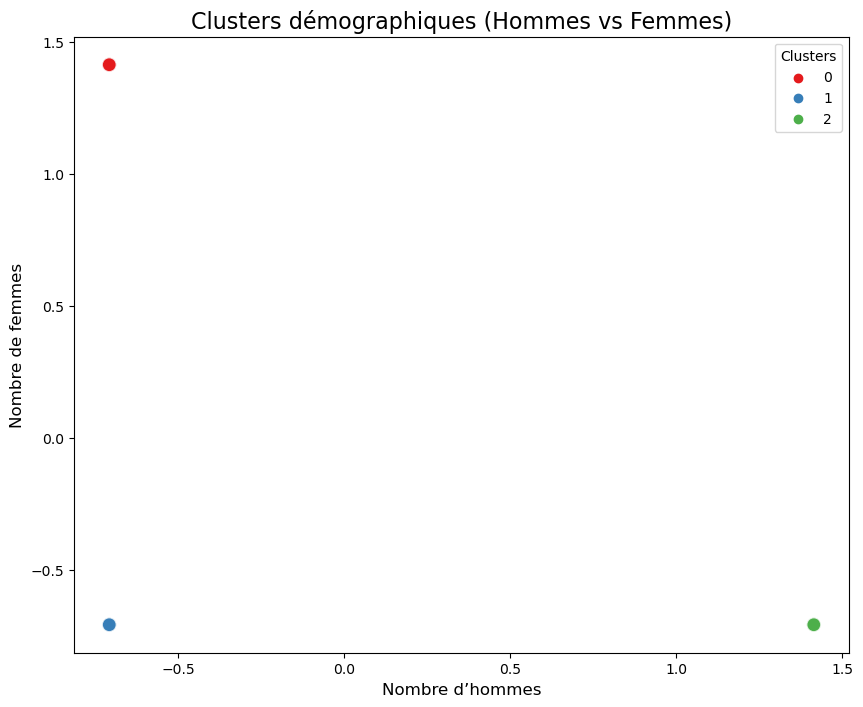

Centroids des clusters :
[[ 1.41421356 -0.70710678]
 [-0.70710678 -0.70710678]
 [-0.70710678  1.41421356]]


In [591]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Assumons que df_mort contient les donn√©es d√©mographiques et g√©ographiques d√©j√† normalis√©es

# √âtape 1 : S√©lectionner les colonnes pertinentes pour le clustering

colonnes_clustering = ['sexe_Femmes', 'sexe_Hommes']
df_clustering = df_mort[colonnes_clustering].dropna()  # Suppression des valeurs manquantes

# √âtape 2 : Appliquer K-means pour identifier des clusters
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)  # Ajout de n_init pour √©viter l'avertissement
df_mort['Cluster'] = kmeans.fit_predict(df_clustering)  # Ajouter les r√©sultats du clustering au DataFrame

# √âtape 3 : Visualiser les clusters d√©mographiques (Sexe Hommes vs Sexe Femmes)
plt.figure(figsize=(10, 8))
sns.scatterplot(data=df_mort, x='sexe_Hommes', y='sexe_Femmes', hue='Cluster', palette='Set1', s=100, alpha=0.7)
plt.title('Clusters d√©mographiques (Hommes vs Femmes)', fontsize=16)
plt.xlabel('Nombre d‚Äôhommes', fontsize=12)
plt.ylabel('Nombre de femmes', fontsize=12)
plt.legend(title='Clusters')
plt.show()

# √âtape 4 : Si les coordonn√©es g√©ographiques existent, visualiser les clusters sur une carte
if 'Latitude' in df_mort.columns and 'Longitude' in df_mort.columns:
    plt.figure(figsize=(10, 8))
    sns.scatterplot(data=df_mort, x='Longitude', y='Latitude', hue='Cluster', palette='Set1', s=100, alpha=0.7)
    plt.title('Clusters g√©ographiques des donn√©es d√©mographiques', fontsize=16)
    plt.xlabel('Longitude', fontsize=12)
    plt.ylabel('Latitude', fontsize=12)
    plt.legend(title='Clusters')
    plt.show()

# Afficher les centroides des clusters
centroids = kmeans.cluster_centers_
print("Centroids des clusters :")
print(centroids)


In [592]:
df_mort

annee_de_deces  region_de_domicile  classe_d_age_de_10_ans  \
0        2019-01-01                   1                    39.5   
1        2020-01-01                   1                    39.5   
2        2021-01-01                   1                    39.5   
3        2022-01-01                   1                    39.5   
4        2019-01-01                   2                    39.5   
...             ...                 ...                     ...   
9067     2022-01-01                  93                    97.5   
9068     2019-01-01                  94                    97.5   
9069     2020-01-01                  94                    97.5   
9070     2021-01-01                  94                    97.5   
9071     2022-01-01                  94                    97.5   

      effectif_de_deces  cause_initiale_de_deces_2. Tumeurs  \
0             -0.596423                           -0.447214   
1             -0.587008                           -0.447214   
2             -0.568179                           -0.447214   
3             -0.587008                           -0.447214   
4             -0.615253                           -0.447214   
...                 ...                                 ...   
9067           2.595233                            2.236068   
9068          -0.530519                            2.236068   
9069          -0.408125                            2.236068   
9070          -0.370465                            2.236068   
9071          -0.502274                            2.236068   

      cause_initiale_de_deces_7. Maladies de l‚Äôappareil circulatoire  \
0                                              2.236068                
1                                              2.236068                
2                                              2.236068                
3                                              2.236068                
4                                              2.236068                
...                                                 ...                
9067                                          -0.447214                
9068                                          -0.447214                
9069                                          -0.447214                
9070                                          -0.447214                
9071                                          -0.447214                

      cause_initiale_de_deces_8. Maladies de l‚Äôappareil respiratoire  \
0                                             -0.447214                
1                                             -0.447214                
2                                             -0.447214                
3                                             -0.447214                
4                                             -0.447214                
...                                                 ...                
9067                                          -0.447214                
9068                                          -0.447214                
9069                                          -0.447214                
9070                                          -0.447214                
9071                                          -0.447214                

      cause_initiale_de_deces_8.2 Pneumonie  \
0                                 -0.447214   
1                                 -0.447214   
2                                 -0.447214   
3                                 -0.447214   
4                                 -0.447214   
...                                     ...   
9067                              -0.447214   
9068                              -0.447214   
9069                              -0.447214   
9070                              -0.447214   
9071                              -0.447214   

      cause_initiale_de_deces_8.3 Maladies chroniques des voies respiratoires inf√©rieures  \
0                                             -0.4

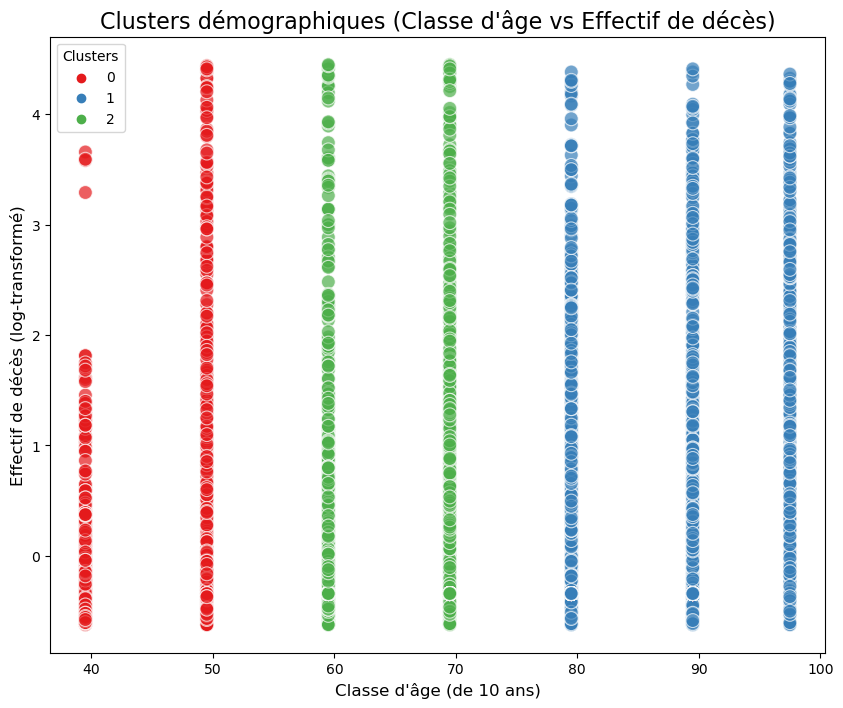

Centroids des clusters :
[[ 4.45000000e+01 -2.60007156e-01]
 [ 8.88333333e+01  1.66552971e-01]
 [ 6.45000000e+01  1.01776990e-02]]


In [596]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np  # Assurez-vous d'importer numpy pour utiliser np.log1p

# Assumons que df_mort contient les donn√©es d√©mographiques et g√©ographiques d√©j√† normalis√©es

# √âtape 1 : S√©lectionner les colonnes pertinentes pour le clustering
colonnes_clustering = ['classe_d_age_de_10_ans', 'effectif_de_deces']  # Utilisation de la variable transform√©e
df_clustering = df_mort[colonnes_clustering].dropna()  # Suppression des valeurs manquantes

# √âtape 2 : Appliquer K-means pour identifier des clusters
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)  # Ajout de n_init pour √©viter l'avertissement
df_mort['Cluster'] = kmeans.fit_predict(df_clustering)  # Ajouter les r√©sultats du clustering au DataFrame

# √âtape 3 : Visualiser les clusters d√©mographiques (Classe d'√¢ge vs Effectif de d√©c√®s)
plt.figure(figsize=(10, 8))
sns.scatterplot(data=df_mort, x='classe_d_age_de_10_ans', y='effectif_de_deces', hue='Cluster', palette='Set1', s=100, alpha=0.7)
plt.title('Clusters d√©mographiques (Classe d\'√¢ge vs Effectif de d√©c√®s)', fontsize=16)
plt.xlabel('Classe d\'√¢ge (de 10 ans)', fontsize=12)
plt.ylabel('Effectif de d√©c√®s (log-transform√©)', fontsize=12)
plt.legend(title='Clusters')
plt.show()

# √âtape 4 : Si les coordonn√©es g√©ographiques existent, visualiser les clusters sur une carte
if 'Latitude' in df_mort.columns and 'Longitude' in df_mort.columns:
    plt.figure(figsize=(10, 8))
    sns.scatterplot(data=df_mort, x='Longitude', y='Latitude', hue='Cluster', palette='Set1', s=100, alpha=0.7)
    plt.title('Clusters g√©ographiques des donn√©es d√©mographiques', fontsize=16)
    plt.xlabel('Longitude', fontsize=12)
    plt.ylabel('Latitude', fontsize=12)
    plt.legend(title='Clusters')
    plt.show()

# Afficher les centroides des clusters
centroids = kmeans.cluster_centers_
print("Centroids des clusters :")
print(centroids)


c)	Interpr√©tez les r√©sultats, par exemple une augmentation de X ¬µg/m¬≥ de PM2.5 est associ√©e √† une augmentation de Y% du taux de mortalit√©

## III. Modalit√©s et livrables

### 1. Modalit√©s

Le projet commence le 21/01 et la pr√©sentation du travail aura lieu le 11/02 

### 2. Livrables

Une archive (enregistr√©e sous vos noms) comprenant : 
- Code python 
- Les donn√©es 
- Un rapport de 5 pages max d√©crivant les diff√©rentes √©tapes (pas de code)
- La pr√©sentation